<a href="https://colab.research.google.com/github/CarolKSD/Statistical-Inference/blob/main/Statistical_Inference_Healthy_Habits_and_Depression_Symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Statistical Inference - Healthy Habits and Depression Symptoms***

## Introduction:

Depression represents a significant public health problem and is identified as one of the leading causes of disease and disability worldwide, according to the World Health Organization (WHO). Depression results from a complex interplay of social, psychological, and biological factors. Although access to diagnosis and treatment is increasing, many individuals still lack adequate control of their depressive symptoms.

To promote a healthy lifestyle, the WHO recommends regular physical activity and a healthy diet rich in whole foods with reduced levels of saturated fat, salt, and refined sugars.

In this project, we will:

*   Assess the profile of adults with depressive symptoms in the United States;
*   Investigate whether healthy eating habits and physical activity are associated with lower rates of depression in this population.

We will utilize data from the 2006 National Health and Nutrition Examination Survey (NHANES), a survey conducted by the National Center for Health Statistics (NCHS) of the Centers for Disease Control and Prevention (CDC) to assess the health and nutrition of adults and children in the United States. Data collected includes demographic, socioeconomic, dietary, and health-related questions, with the examination component containing medical, dental, physiological, and laboratory measurements. From this data, we will use the demographic and PHQ-9, HEI, and PAG datasets.

**Patient Health Questionnaire-9 (PHQ-9)**

The Patient Health Questionnaire-9 (PHQ-9) is a tool used to assess the severity of depression in patients. It consists of a 9-item questionnaire where respondents indicate the frequency of depression symptoms over the past two weeks using the following response options: "During the past 2 weeks, how often have you been bothered by any of the following problems? (0 = not at all, 1 = several days, 2 = more than half the days, and 3 = nearly every day)."

The total score is calculated by summing items 1-9 and ranges from 0 to 27, with higher scores indicating greater frequency of depressive symptoms. Individuals with a total PHQ-9 score of 5 or more are considered to have mild (5-9), moderate (10-14), moderately severe (15-19), or severe depression (≥ 20).

**Healthy Eating Index (HEI)**

The Healthy Eating Index (HEI) is a measure of diet quality composed of 13 components based on the U.S. Dietary Guidelines for Americans. The HEI uses various food groups to calculate the score, ranging from 0 to 100, with higher scores reflecting diets more closely aligned with dietary guidelines.

**Physical Activity Guidelines (PAG)**

The Physical Activity Guidelines for Americans (PAG) are issued by the U.S. Department of Health and Human Services (HHS) and provide recommendations for physical activity. This document is used in conjunction with the Dietary Guidelines for Americans to promote the importance of being physically active and following a healthy diet.

The PAG recommends that adults engage in at least 150 minutes of moderate-intensity aerobic activity or 75 minutes of vigorous-intensity aerobic activity per week. Using data collected from NHANES, the number of minutes of physical activity is calculated as the total minutes of moderate-intensity aerobic activity plus 2*(total minutes of vigorous-intensity aerobic activity).

## Metodology:

The project will be divided into three main stages:

1.   Data loading and preprocessing;

The datasets consist of two files:

*   PHQ-9 and demographic data of adults surveyed in the NHANES 2005-2006;
*   HEI and PAG data of children and adults surveyed in the NHANES 2005-2006;

2.   Univariate exploratory analysis to understand the data distribution in the research sample;

3.   Bivariate exploratory analysis combined with hypothesis testing to identify:

*   The profile of adult individuals with depressive symptoms in the US;
*   Possible associations between healthy eating habits, physical activity, and depression rates.

The research examines a sample selected using complex sampling to obtain a representative sample of the US non-institutionalized civilian population. Therefore, analyses using this study should be conducted using techniques and tools that account for complex sampling. However, for didactic purposes, we will assume that the data was obtained using a simple random sample of the population of interest and will use standard analysis techniques and tools for simple random samples.

## Data Acquisition:

In [ ]:
# Data manipulation libraries
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)

# Library for missing data analysis
import missingno as msno

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Statistics and hypothesis testing libraries
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
demo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DEMO_PHQ.csv')
pag_hei = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PAG_HEI.csv')

In [4]:
demo

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0


In [5]:
pag_hei

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
9420,41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
9421,41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467
9422,41473,685.912240,3.0,3.907340,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,7.458058,10.000000,1.676912,2.751168,45.793478


The datasets have different sizes since the PHQ-9 questionnaire includes only adults, while the study on eating habits and physical activity also includes children. We will now merge the datasets into a single dataframe and begin data preprocessing.

In [6]:
db = demo.merge(pag_hei, on = 'SEQN', how = 'left')

In [7]:
db

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467


## Data processing:

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

Evaluating the percentage of missing cases:


In [9]:
db.isnull().mean().round(4)*100

,0
SEQN,0.00
DPQ010,9.34
DPQ020,9.34
DPQ030,9.34
DPQ040,9.34
DPQ050,9.34
DPQ060,9.34
DPQ070,9.34
DPQ080,9.34
DPQ090,9.34


In [10]:
db.drop(columns=['SEQN']).describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,5334.00,5334.00,5334.00,5334.00,5287.00,5334.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,0.31,0.31,0.55,0.72,0.32,0.21,0.23,0.15,0.05,1.52,45.09,2.87,3.23,8.74,471.77,1.98,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,0.76,0.71,0.93,0.91,0.74,0.62,0.64,0.59,0.33,0.50,20.15,1.13,1.27,12.78,780.35,0.92,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,3.00,2.00,4.00,35.00,1.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,43.00,3.00,3.00,7.00,210.00,2.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,62.00,4.00,4.00,10.00,568.93,3.00,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
95%,2.00,2.00,3.00,3.00,2.00,1.00,1.00,1.00,0.00,2.00,81.00,4.00,5.00,11.00,1863.05,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19
99%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,2.00,85.00,5.00,5.00,99.00,3672.06,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,2.00,85.00,5.00,9.00,99.00,10777.83,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


Since a week has a maximum of 168 hours (10,080 minutes), the maximum value found for PAG_MINW (10,777 min/week) is not possible. Therefore, during data processing, we will limit the maximum value to the one obtained at the 99th percentile (3,672.06 min/week). Additionally, for easier interpretation, we will convert the values to hours per week.




Distribution of scores for PHQ-9:

In [11]:
db[['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']].agg(['value_counts'])

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0.0,3850,3769,3152,2429,3813,4134,4070,4362,4667
1.0,673,769,1071,1706,691,513,545,341,122
2.0,180,179,286,370,160,95,118,79,32
3.0,124,114,320,326,168,89,99,45,13
9.0,9,5,7,5,4,5,4,9,2


Distribution of race:

In [12]:
db[["RIDRETH1"]].value_counts(sort = False)

# 1	Mexican American
# 2	Other Hispanic
# 3	Non-Hispanic White
# 4	Non-Hispanic Black
# 5	Other Race - Including Multi-Racial

,count
RIDRETH1,
1,1133
2,164
3,2516
4,1300
5,221


Since the values for “2 - Other Hispanic” and “5 - Other Race” are low, and both represent ethnicities not specifically listed, we will combine them under “5 - Others.”

Distribution of education level:

In [13]:
db[["DMDEDUC"]].value_counts(sort = False)

#1 = Less than 9th grade
#2 = 9th-12th grade
#3 = High school graduate
#4 = Some college, no degree
#5 = College graduate or higher
#7 = Refused to answer
#9 = Doesn’t know

,count
DMDEDUC,
1,618
2,936
3,1335
4,1498
5,939
7,4
9,4


Distribution of income:

In [14]:
db[["INDFMINC"]].value_counts(sort = False)

# 1 = 0-4999
# 2 - 5000-9999
# 3 = 10000-14999
# 4 = 15000-19999
# 5 = 20000-24999
# 6 = 25000-34999
# 7 = 35000-44999
# 8 = 45000-54999
# 9 = 55000-64999
# 10 = 65000-74999
# 11 = Greater than or equal to 75,000
# 12 = Greater than 20,000
# 13 = Less than 20,000
# 77 = Refused to answer
# 99 = Doesn’t know

,count
INDFMINC,
1.0,190
2.0,281
3.0,440
4.0,412
5.0,426
6.0,678
7.0,535
8.0,485
9.0,297


We can observe from the dictionary that we have overlapping income categories. Categories 12 and 13 contain value ranges that are already categorized more specifically in other responses. This will be addressed later.

Distribution of adherence group:

In [15]:
db[["ADHERENCE"]].value_counts(sort = False)

# 1 = Low (< 150 min/week)
# 2 = Adequate (150-300 min/week)
# 3 = Above (> 300 min/week)

,count
ADHERENCE,
1.0,2304
2.0,834
3.0,2196


Sex distribution:

In [16]:
db[['RIAGENDR']].value_counts(sort = False)

# 1 = Male
# 2 = Female

,count
RIAGENDR,
1,2561
2,2773


The following data treatments will be applied:

•	For the PHQ-9 questions (DPQ010 to DPQ090), values 7 and 9 will be replaced by the individual’s average score on the other questions.

•	For Education (DMDEDUC), values 7 and 9 will be replaced with NaN.

•	For Ethnicity (RIDRETH1), groups identified as “others” will be combined.

•	For Income (INDFMINC), values 77 and 99 will be replaced with NaN.

•	Income (INDFMINC) will be converted into an average of the income range to transform it into a quantitative variable. For ranges with only one limit, that limit will be used.

•	We will limit the maximum value of PAG_MINW to the 99th percentile and transform the values into hours per week.

•	Nominal categorical variables will be converted to the data type Category.

In [17]:
replace_map = {
    # 7 and 9 will be replaced with missing values for the DPQ0X0 variables to be filled sequentially.
    'DPQ010': {7 : np.nan, 9 : np.nan},
    'DPQ020': {7 : np.nan, 9 : np.nan},
    'DPQ030': {7 : np.nan, 9 : np.nan},
    'DPQ040': {7 : np.nan, 9 : np.nan},
    'DPQ050': {7 : np.nan, 9 : np.nan},
    'DPQ060': {7 : np.nan, 9 : np.nan},
    'DPQ070': {7 : np.nan, 9 : np.nan},
    'DPQ080': {7 : np.nan, 9 : np.nan},
    'DPQ090': {7 : np.nan, 9 : np.nan},
    'DMDEDUC': {7 : np.nan, 9 : np.nan},
    'RIDRETH1': {2: 5}, # “Other Hispanic” and “Others” will be merged into a single category.
    # Converting the categorical income variable into a quantitative variable by using the midpoint of each category.
    'INDFMINC': {1: np.mean([0,4999]), 2: np.mean([5000,9999]), 3: np.mean([10000,14999]),4: np.mean([15000,19999]),
                 5: np.mean([20000,24999]),6: np.mean([25000,34999]), 7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
                 9: np.mean([55000,64999]), 10: np.mean([65000,74999]), 11: 75000, 12: np.mean([20000, 90000]),
                 13: np.mean([0, 19999]), 77: np.nan, 99: np.nan}
}

In [18]:
db2 = db.replace(replace_map)

In [19]:
db2

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4.0,17499.5,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4.0,75000.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5.0,75000.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3.0,55000.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,5,3.0,75000.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2.0,12499.5,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1.0,49999.5,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4.0,7499.5,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4.0,39999.5,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467


In [20]:
db2['temporary_mean'] = db2[['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050',
                             'DPQ060','DPQ070','DPQ080','DPQ090']].mean(axis=1).round(0)

In [21]:
db2['DPQ010'] = np.where(db2['DPQ010'].isnull(), db2['temporary_mean'], db2['DPQ010'])
db2['DPQ020'] = np.where(db2['DPQ020'].isnull(), db2['temporary_mean'], db2['DPQ020'])
db2['DPQ030'] = np.where(db2['DPQ030'].isnull(), db2['temporary_mean'], db2['DPQ030'])
db2['DPQ040'] = np.where(db2['DPQ040'].isnull(), db2['temporary_mean'], db2['DPQ040'])
db2['DPQ050'] = np.where(db2['DPQ050'].isnull(), db2['temporary_mean'], db2['DPQ050'])
db2['DPQ060'] = np.where(db2['DPQ060'].isnull(), db2['temporary_mean'], db2['DPQ060'])
db2['DPQ070'] = np.where(db2['DPQ070'].isnull(), db2['temporary_mean'], db2['DPQ070'])
db2['DPQ080'] = np.where(db2['DPQ080'].isnull(), db2['temporary_mean'], db2['DPQ080'])
db2['DPQ090'] = np.where(db2['DPQ090'].isnull(), db2['temporary_mean'], db2['DPQ090'])

In [22]:
db2.drop('temporary_mean',axis=1, inplace=True)

In [23]:
db2['PAG_HRW_trunc'] = np.where(db2['PAG_MINW'] > 3672.06, 3672.06, db2['PAG_MINW'])/60

In [24]:
db2[['PAG_MINW', 'PAG_HRW_trunc']].describe(percentiles = [.05,.25, .5, .75, .95, .99]).round(2)

,PAG_MINW,PAG_HRW_trunc
count,5334.00,5334.00
mean,471.77,7.59
std,780.35,11.11
min,0.00,0.00
5%,0.00,0.00
25%,35.00,0.58
50%,210.00,3.50
75%,568.93,9.48
95%,1863.05,31.05
99%,3672.06,61.20


In [25]:
db2['RIAGENDR'] = db2['RIAGENDR'].astype('category')
db2['RIDRETH1'] = db2['RIDRETH1'].astype('category')
db2['DMDEDUC'] = db2['DMDEDUC'].astype('category')

We will now create two new variables. The first (PHQ9) will contain the sum of the responses from the PHQ-9, giving a total score for each individual, ranging from 0 to 27. The second (PHQ_GRP) will categorize individuals into 5 groups based on their depression symptom severity:

•	0: “no symptoms” if PHQ9 < 5,

•	1: “mild symptoms” if 5 <= PHQ9 < 10,

•	2: “moderate symptoms” if 10 <= PHQ9 < 15,

•	3: “moderately severe symptoms” if 15 <= PHQ9 < 20,

•	4: “severe symptoms” if PHQ9 >= 20.

In [26]:
db2['PHQ9'] = db2[["DPQ010", "DPQ020", "DPQ030", "DPQ040", "DPQ050",
                 "DPQ060", "DPQ070","DPQ080","DPQ090"]].sum(axis=1, skipna = False)
# skipna = False: We will ensure that when there is missing information, the result will not be 0, but rather NaN.

In [27]:
db2['PHQ_GRP'] = pd.cut(db2['PHQ9'], [0,5,9,14,19,100], include_lowest=True, right=True, labels=[0,1,2,3,4])

In [28]:
db2

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PAG_HRW_trunc,PHQ9,PHQ_GRP
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4.0,17499.5,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4.0,75000.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,4.411855,0.0,0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5.0,75000.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,22.555812,0.0,0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3.0,55000.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,16.857968,0.0,0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,5,3.0,75000.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,28.819092,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2.0,12499.5,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,0.153965,2.0,0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1.0,49999.5,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,2.886836,10.0,2
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4.0,7499.5,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,3.078522,2.0,0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4.0,39999.5,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.461894,0.0,0


In [29]:
db2[["PHQ_GRP"]].value_counts(sort = False)

,count
PHQ_GRP,
0,4032
1,495
2,209
3,75
4,25


In [32]:
if isinstance(db2["PHQ_GRP"].dtype, pd.CategoricalDtype):
    db2["PHQ_GRP"] = db2["PHQ_GRP"].cat.set_categories([0, 1, 2], ordered=True)
    db2.loc[db2["PHQ_GRP"].isin([3, 4]), "PHQ_GRP"] = 2 # Assign values 3 and 4 to category 2
else:
    db2["PHQ_GRP"] = db2["PHQ_GRP"].replace([3, 4], 2)

In [33]:
db2[["PHQ_GRP"]].value_counts(sort = False)

,count
PHQ_GRP,
0,4032
1,495
2,209


In [34]:
null = db2.isna().mean()*100
null[null > 0].sort_values(ascending=False)

,0
PHQ_GRP,11.211099
DPQ070,9.336333
PHQ9,9.336333
DPQ020,9.336333
DPQ090,9.336333
DPQ080,9.336333
DPQ010,9.336333
DPQ060,9.336333
DPQ030,9.336333
DPQ040,9.336333


## Univariate Analysis

We will perform a univariate analysis to understand the distribuition of the data. To do this, we will create lists and libraries to be used to facilitate the analysis and plotting of graphs.

In [35]:
# List of quantitative variables
var_quant = [
    "RIDAGEYR",
    "INDFMINC",
    "PAG_HRW_trunc",
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "PHQ9"]

In [36]:
# Tittle related to quantitative variable
tittle_quant = {
    "RIDAGEYR" : 'Age in years',
    "INDFMINC" : 'Annual household income (US$)',
    "PAG_HRW_trunc" : 'Physical activity (h/week)',
    "HEI2015C1_TOTALVEG" : 'Total Vegetables',
    "HEI2015C2_GREEN_AND_BEAN" : 'Dark green vegetables \n and legumes ',
    "HEI2015C3_TOTALFRUIT" : 'Total fruits',
    "HEI2015C4_WHOLEFRUIT" : 'Fruits in natura',
    "HEI2015C5_WHOLEGRAIN" : 'Whole grains',
    "HEI2015C6_TOTALDAIRY" : 'Dairy',
    "HEI2015C7_TOTPROT" : 'Proteins',
    "HEI2015C8_SEAPLANT_PROT" : 'Sea plants \n and plant proteins',
    "HEI2015C9_FATTYACID" : 'Fatty acid',
    "HEI2015C10_SODIUM" : 'Sodium',
    "HEI2015C11_REFINEDGRAIN" : 'Refined grains',
    "HEI2015C12_SFAT" : 'Saturated fat',
    "HEI2015C13_ADDSUG" : 'Added sugars',
    "HEI2015_TOTAL_SCORE" : 'Healthy Eating Index',
    "PHQ9" : 'Pontuação PHQ'}

In [37]:
# List of qualitative variables
var_quali = [
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    'DPQ010',
    'DPQ020',
    'DPQ030',
    'DPQ040',
    'DPQ050',
    'DPQ060',
    'DPQ070',
    'DPQ080',
    'DPQ090',
    "PHQ_GRP"]

In [38]:
# Tittle related to the qualitative variable
tittle_quali = {
    "RIAGENDR": 'Genre',
    "RIDRETH1": 'Ethnicity',
    "DMDEDUC": 'Education',
    "ADHERENCE": 'Adherence to PAG',
    'DPQ010' : 'Little interest/pleasure',
    'DPQ020' : 'Depressed or without perspective',
    'DPQ030' : 'Lack or excess of sleep',
    'DPQ040' : 'Tired or low energy',
    'DPQ050' : 'Lack or excess of appetite',
    'DPQ060' : 'If you felt bad about yourself',
    'DPQ070' : 'Difficulty concentrating',
    'DPQ080' : 'Very slow or restless',
    'DPQ090' : 'Thought about hurting yourself',
    "PHQ_GRP": 'Depression symptom severity'}

In [39]:
# Legend of the categories of each qualitative variable
legend_quali = {
    "RIAGENDR": {1: 'Male', 2: 'Female'},
    "RIDRETH1": {1: 'Mexican American', 3: 'White \n non-Hispanic', 4: 'Black \n non-Hispanic', 5:'Other'},
    "DMDEDUC": {1: "< 9 grade", 2: "9-12 grade", 3: "High \n education", 4: " Incomplete college", 5: "Complete college"},
    "ADHERENCE": {1: 'Low', 2: 'Adequate', 3: 'Above'},
    'DPQ010' : {0:'None \n time', 1:'Less than \n 1 week', 2:'1 week \n ou more', 3:'Almost every \n day'},
    'DPQ020' : {0:'None \n time', 1:'Less than \n 1 week', 2:'1 week \n ou more', 3:'Almost every \n day'},
    'DPQ030' : {0:'None \n time', 1:'Less than \n 1 week', 2:'1 week \n ou more', 3:'Almost every \n day'},
    'DPQ040' : {0:'None \n time', 1:'Less than \n 1 week', 2:'1 week \n ou more', 3:'Almost every \n day'},
    'DPQ050' : {0:'None \n time', 1:'Less than \n 1 week', 2:'1 week \n ou more', 3:'Almost every \n day'},
    'DPQ060' : {0:'None \n time', 1:'Less than \n 1 week', 2:'1 week \n ou more', 3:'Almost every \n day'},
    'DPQ070' : {0:'None \n time', 1:'Less than \n 1 week', 2:'1 week \n ou more', 3:'Almost every \n day'},
    'DPQ080' : {0:'None \n time', 1:'Less than \n 1 week', 2:'1 week \n ou more', 3:'Almost every \n day'},
    'DPQ090' : {0:'None \n time', 1:'Less than \n 1 week', 2:'1 week \n ou more', 3:'Almost every \n day'},
    "PHQ_GRP": {0: "No symptoms", 1: "Mild symptoms", 2: "Moderate/severe symptoms"}}

In [40]:
# List of categories for plotting qualitative variables in an ordered manner
order_quali = {
    "RIAGENDR": ['Male', 'Female'],
    "RIDRETH1": ['Mexican American', 'White \n non-Hispanic', 'Black \n non-Hispanic', 'Other'],
    "DMDEDUC": ["< 9 grade", "9-12 grade", "High \n education", " Incomplete college", "Complete college"],
    "ADHERENCE": ['Low', 'Adequate', 'Above'],
    'DPQ010' : ['None \n time', 'Less than \n 1 week', '1 week \n ou more', 'Almost every \n day'],
    'DPQ020' : ['None \n time', 'Less than \n 1 week', '1 week \n ou more', 'Almost every \n day'],
    'DPQ030' : ['None \n time', 'Less than \n 1 week', '1 week \n ou more', 'Almost every \n day'],
    'DPQ040' : ['None \n time', 'Less than \n 1 week', '1 week \n ou more', 'Almost every \n day'],
    'DPQ050' : ['None \n time', 'Less than \n 1 week', '1 week \n ou more', 'Almost every \n day'],
    'DPQ060' : ['None \n time', 'Less than \n 1 week', '1 week \n ou more', 'Almost every \n day'],
    'DPQ070' : ['None \n time', 'Less than \n 1 week', '1 week \n ou more', 'Almost every \n day'],
    'DPQ080' : ['None \n time', 'Less than \n 1 week', '1 week \n ou more', 'Almost every \n day'],
    'DPQ090' : ['None \n time', 'Less than \n 1 week', '1 week \n ou more', 'Almost every \n day'],
    "PHQ_GRP": ["No symptoms", "Mild symptoms", "Moderate/severe symptoms"]}

Distribution of quantitative variables



In [41]:
var_quant2 = np.array(var_quant).reshape(6,3)

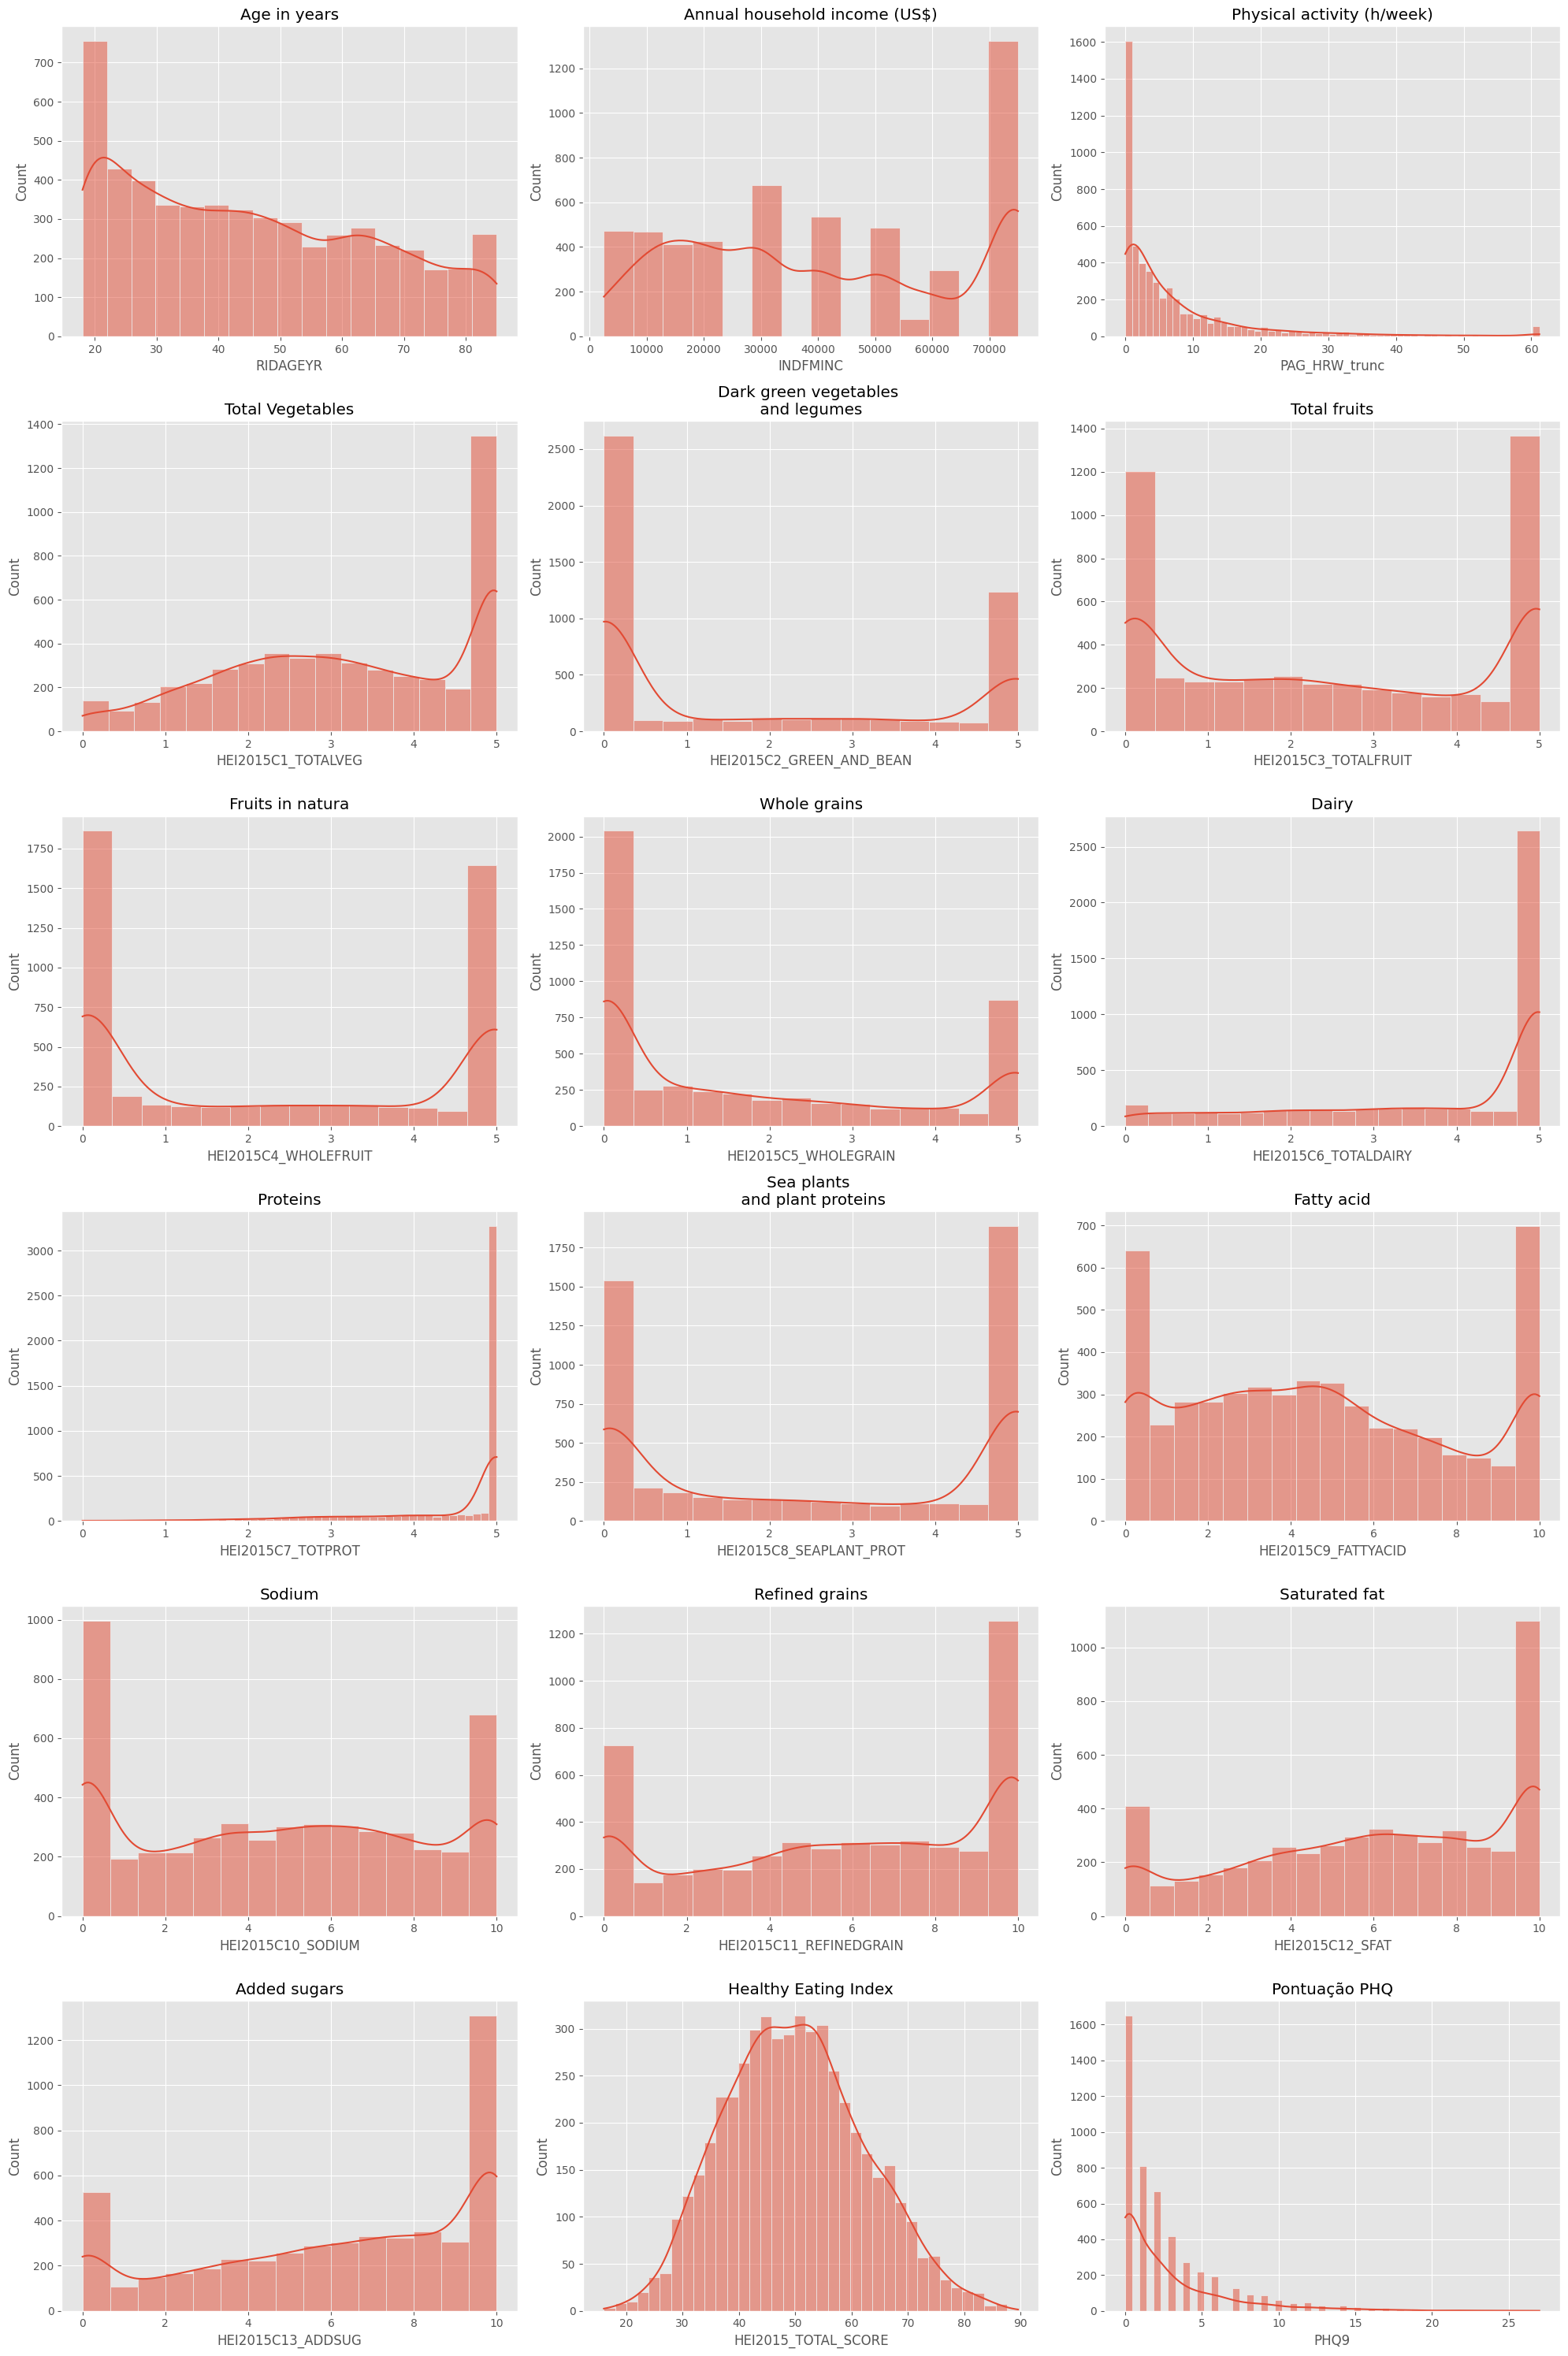

In [42]:
fig, eixo = plt.subplots(6,3,figsize=(20,30))

for row in range(var_quant2.shape[0]):
    for column in range(var_quant2.shape[1]):
        sns.histplot(db2, ax=eixo[row][column], x=var_quant2[row][column], kde=True)
        eixo[row][column].set_ylabel('Count')
        eixo[row][column].set_title(tittle_quant[var_quant2[row][column]])

plt.tight_layout()
plt.show()

For the dietary habits data, we observe that, in general, most of the data is concentrated at the extremes. Therefore, we chose to treat these variables as qualitative, dividing them into two groups: values up to 50% of the maximum value and values above 50%. As for the total HEI score, we have a normal distribution.

In [43]:
list_HEI = ['HEI2015C1_TOTALVEG','HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT','HEI2015C4_WHOLEFRUIT',
             'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
             'HEI2015C9_FATTYACID','HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG']

In [44]:
for category in list_HEI:
    conditions = [
        (db2[category].isna()),
        (db2[category] == db2[category].min()),
        (db2[category] > db2[category].min()) & (db2[category] < db2[category].max()),
        (db2[category] == db2[category].max())]
    values = [np.nan, 0, 1, 2]

    db2[category] = np.select(conditions, values)

    legend_quali[category] = {0:'Minimum', 1:'Intermediate', 2:'Maximum'}
    order_quali[category] = ['Minimum','Intermediate', 'Maximum']

Since the variable PAG_HRW is highly skewed, we can also create a version with the logarithm, aiming for a distribution more similar to a normal distribution.

In [45]:
db2["PAG_HRW_log"] = np.log(db2["PAG_HRW_trunc"] + 1)

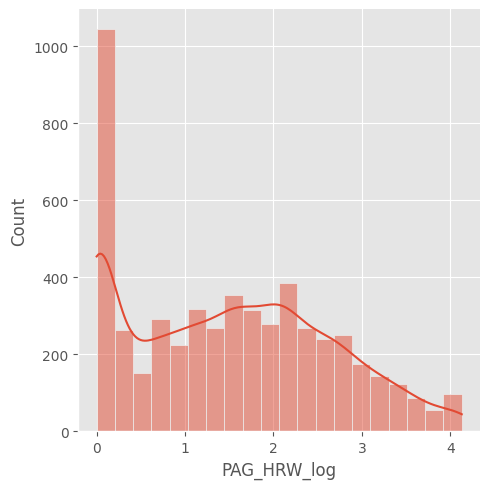

In [46]:
sns.displot(db2, x="PAG_HRW_log", kde=True)
plt.show()

In [47]:
tittle_quant['PAG_HRW_log']='Physical activity log (h/week)'

Distribution of qualitative variables

In [48]:
var_quali2 = var_quali.copy()
var_quali2.append('')

var_quali2 = np.array(var_quali2).reshape(5,3)

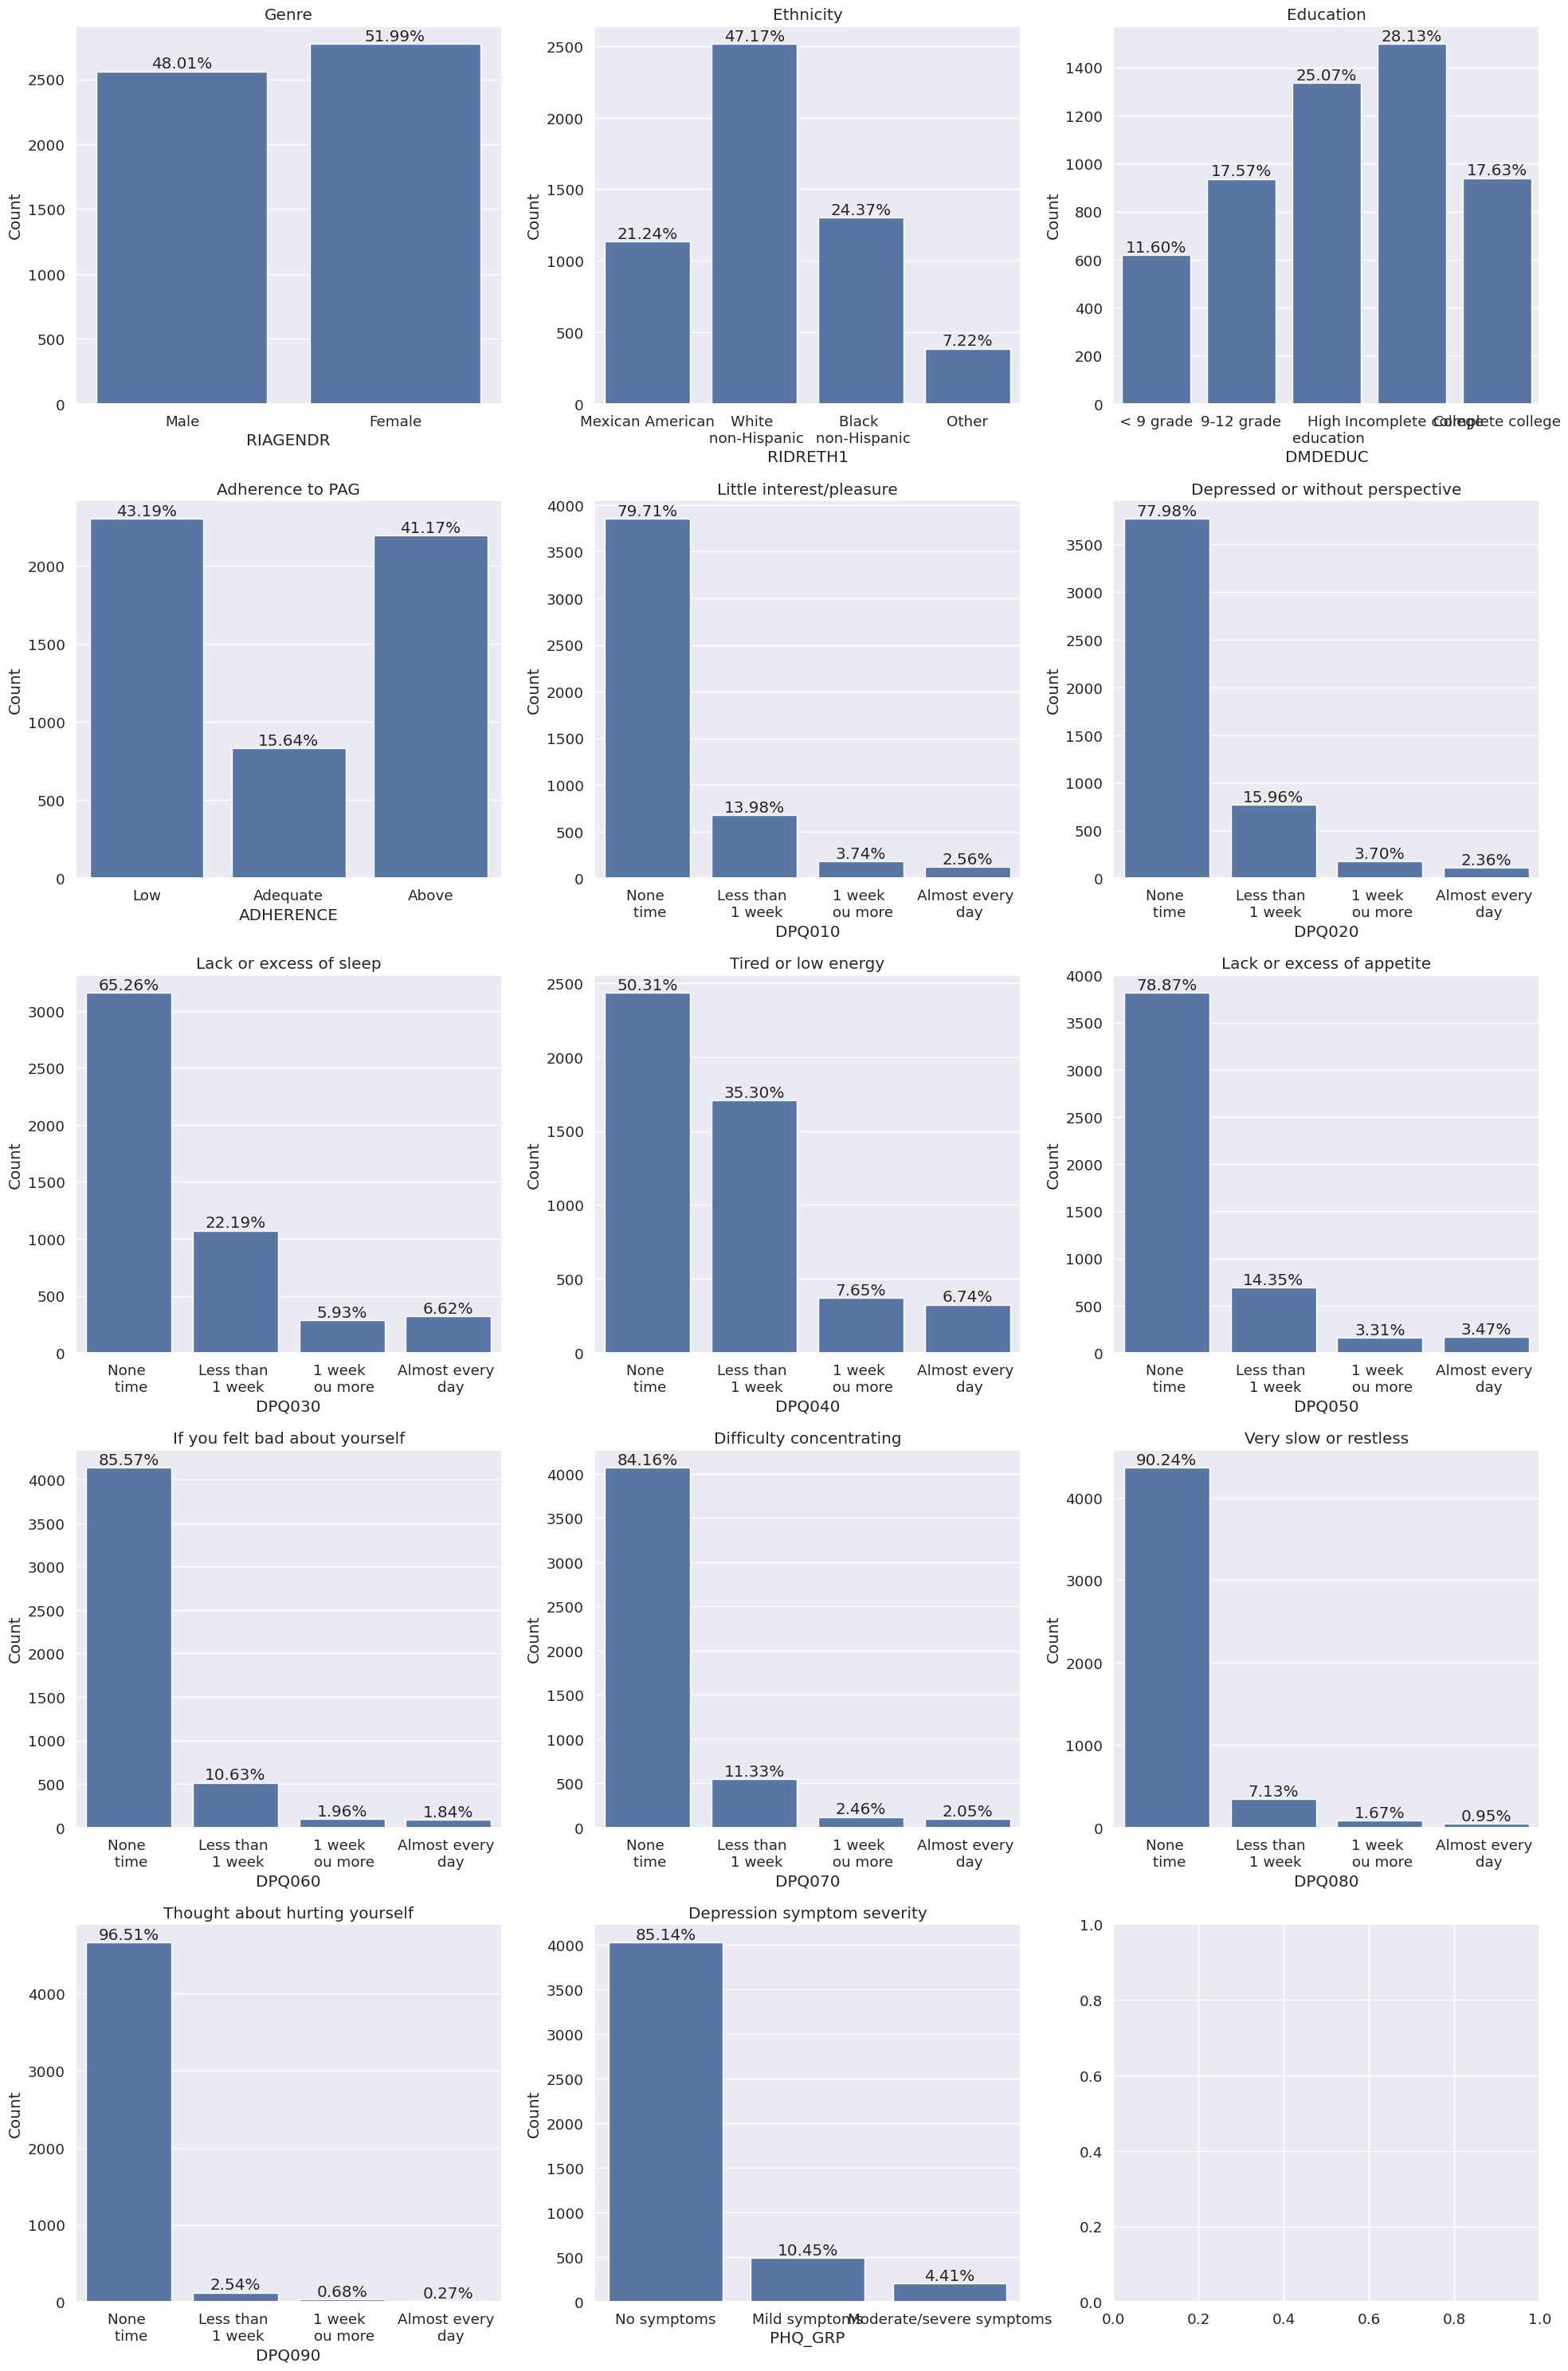

In [49]:
# Replace values in the columns according to legend_quali
for col in var_quali2.flatten():
    if col:  # Check if col is not an empty string
        try:
            if isinstance(db2[col].dtype, pd.CategoricalDtype):
                # If the column is categorical, rename the categories
                db2[col] = db2[col].cat.rename_categories(legend_quali[col])
            else:
                # If not categorical, apply replace directly
                db2[col] = db2[col].replace(legend_quali[col])
        except KeyError as e:
            print(f"KeyError: {e} - The column '{col}' was not found in the DataFrame.")

# Set the style for the plot
sns.set(font_scale=1.2)
fig, ax = plt.subplots(5, 3, figsize=(20, 30))

for row in range(var_quali2.shape[0]):
    for column in range(var_quali2.shape[1]):
        col_name = var_quali2[row][column]
        if col_name:  # Check if col_name is not an empty string
            if col_name in db2.columns:  # Check if the column exists in the DataFrame
                sns.countplot(ax=ax[row][column], x=db2[col_name], order=order_quali[col_name])
                ax[row][column].set_ylabel('Count')
                ax[row][column].set_title(tittle_quali[col_name])

                ncount = db2[col_name].count()
                for p in ax[row][column].patches:
                    x = p.get_bbox().get_points()[:, 0]
                    y = p.get_bbox().get_points()[1, 1]
                    ax[row][column].annotate('{:.2f}%'.format(100. * y / ncount), (x.mean(), y),
                                              ha='center', va='bottom')  # set the alignment of the text
            else:
                print(f"The column '{col_name}' does not exist in the DataFrame.")

plt.tight_layout()
plt.show()

## Bivariate Analysis and Hypothesis Testing

Finally, we will conduct a bivariate analysis of the data, along with hypothesis testing, to identify potential statistically significant associations between:

•	Demographic data and groups with different severities of depression symptoms;

•	Demographic data and healthy habits related to diet and physical activity;

•	Healthy habits and depression symptoms.

Since several plots will be generated repeatedly, we will define a function to assist in this process.

In [112]:
# Function to build boxplot

def boxplot_graph(data, x, y, label, y_axis_tittle, order, graph_tittle):

    if y_axis_tittle == "":
        y_axis_tittle = y
    elif type(y_axis_tittle)==str:
        pass
    else:
        y_axis_tittle = y_axis_tittle[y]

    if order =="":
        sns.boxplot(x=x, y=y, data=data.replace(label))
    else:
        sns.boxplot(x=x, y=y, data=data.replace(label),order=order[x])
    if graph_tittle != '':
        plt.title(graph_tittle)
    else:
        pass
    plt.ylabel(y_axis_tittle)
    plt.tight_layout()
    plt.show()

In [51]:
def countplot_graph(data, x, y, legend, order, tittle):

    per_category = pd.crosstab(index=[data.replace(legend)[x]], columns=[data.replace(legend)[y]])[order_quali[y]]

    for column in per_category.columns:
        per_category[column] = per_category[column]*100/per_category[column].sum()

    sns.set(font_scale=1.2)
    fig, ax = plt.subplots(2,1,figsize=(20,10))
    fig.suptitle(tittle,fontsize=25)

    sns.countplot(data=db2.replace(legend), order = order_quali[x], hue_order = order_quali[y],
                  x=x, hue=y, ax=ax[0])
    ax[0].set_title("Absolut numbers",fontsize=18)
    ax[0].set_ylabel('Count')

    for p in ax[0].patches:
        x_=p.get_bbox().get_points()[:,0]
        y_=p.get_bbox().get_points()[1,1]
        ax[0].annotate('{:.0f}'.format(y_), (x_.mean(), y_),
                        ha='center', va='bottom')

    per_category.T.plot(kind ='bar',stacked=False,ax=ax[1])
    ax[1].set_title("Distribution proportional to the total sample",fontsize=18)
    ax[1].tick_params(axis='x', rotation=0)
    ax[1].set_ylabel('Count')

    for p in ax[1].patches:
        x_=p.get_bbox().get_points()[:,0]
        y_=p.get_bbox().get_points()[1,1]
        ax[1].annotate('{:.1f}%'.format(y_), (x_.mean(), y_),
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

**Symptoms of Depression and Demographic Characteristics**




Age

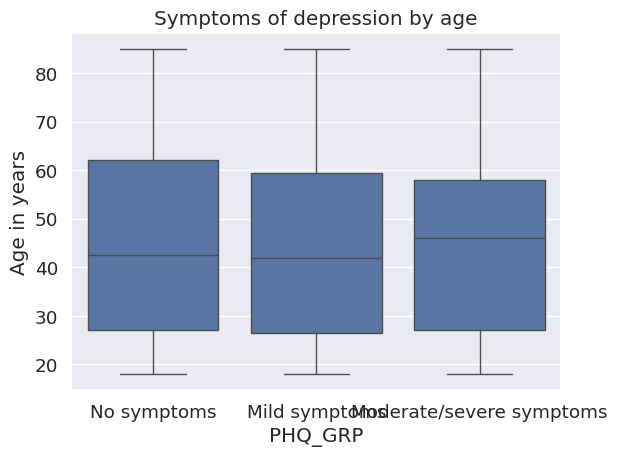

In [113]:
boxplot_graph(db2, "PHQ_GRP", "RIDAGEYR", legend_quali, tittle_quant, order_quali,'Symptoms of depression by age')

Visually, the median and mean age appear to be close, with small differences between the different levels of depression symptoms.

Therefore, we will perform a test to compare the mean age across the three groups of depression symptoms. The F-test from ANOVA will be used, where the null hypothesis is “There is no difference between the depression groups with respect to the mean age,” and the alternative hypothesis is “There is at least one difference in the mean age between the groups of depression symptoms.”

In [53]:
# Filter out rows with NaN in PHQ_GRP before running ANOVA
df_aux = db2[["PHQ_GRP", "RIDAGEYR"]].dropna()

# Perform ANOVA
stat, p = stats.f_oneway(
    df_aux[df_aux.PHQ_GRP == 'No symptoms']["RIDAGEYR"],
    df_aux[df_aux.PHQ_GRP == 'Mild symptoms']["RIDAGEYR"],
    df_aux[df_aux.PHQ_GRP == 'Moderate/severe symptoms']["RIDAGEYR"]
)

# Print results
print(f'stat={stat:.3f}, p={p:.3f}')

# Check hypothesis
if p > 0.05:
    print('Probably the means are equal, not rejecting H0')
else:
    print('Probably the means are different, rejecting H0')

stat=0.551, p=0.577
Probably the means are equal, not rejecting H0


Thus, with a p-value of 0.577, we see that observing means like those in the sample is quite likely if the null hypothesis is true, leading us to not reject it. Therefore, we cannot detect a statistically significant difference between the depression groups regarding the mean age.

Income

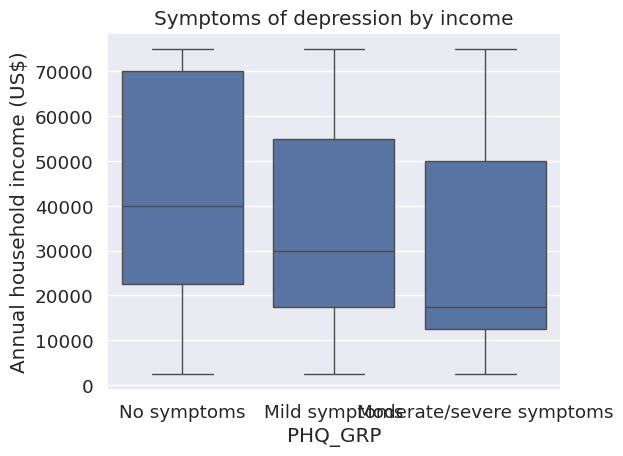

In [54]:
boxplot_graph(db2, "PHQ_GRP", "INDFMINC", legend_quali, tittle_quant,order_quali,'Symptoms of depression by income')

In this case, the graph clearly shows that the means and medians differ between each group. We will test the null hypothesis, “There is no difference between the depression groups with respect to the average income,” to verify this observation.

In [55]:
# Filter out rows with NaN in PHQ_GRP and INDFMINC before running ANOVA
df_aux = db2[["PHQ_GRP", "INDFMINC"]].dropna()

# Perform ANOVA
stat, p = stats.f_oneway(
    df_aux[df_aux.PHQ_GRP == 'No symptoms']["INDFMINC"],
    df_aux[df_aux.PHQ_GRP == 'Mild symptoms']["INDFMINC"],
    df_aux[df_aux.PHQ_GRP == 'Moderate/severe symptoms']["INDFMINC"]
)

# Print results
print(f'stat={stat:.3f}, p={p:.3f}')

# Check hypothesis
if p > 0.05:
    print('Probably the means are equal, not rejecting H0')
else:
    print('Probably the means are different, rejecting H0')

stat=35.733, p=0.000
Probably the means are different, rejecting H0


Since p < 0.05, and in this case practically zero, the probability of observing what we are seeing in this sample is extremely low if the null hypothesis were true. Therefore, we have evidence that the null hypothesis is not true, and we reject it.

As the F-test only indicates that there is at least one difference between the symptom groups in terms of average income, we will now conduct Tukey’s Multiple Comparison Test to investigate which specific differences are significant.

In [56]:
# Tukey's test for multiple comparisons
tukey = pairwise_tukeyhsd(df_aux['INDFMINC'],
                  df_aux['PHQ_GRP'],
                  alpha = 0.05)
print(tukey)

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
         group1                   group2           meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------------------------
           Mild symptoms Moderate/severe symptoms -6840.1492 0.002 -11571.0877 -2109.2106   True
           Mild symptoms              No symptoms  5702.8946   0.0   2943.3608  8462.4283   True
Moderate/severe symptoms              No symptoms 12543.0437   0.0   8493.8366 16592.2509   True
------------------------------------------------------------------------------------------------


Thus, it is evident that there is a difference in the average incomes among the three depression symptom groups.

Gender

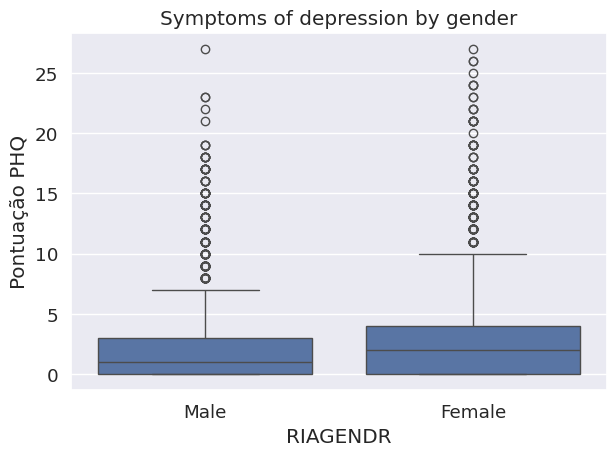

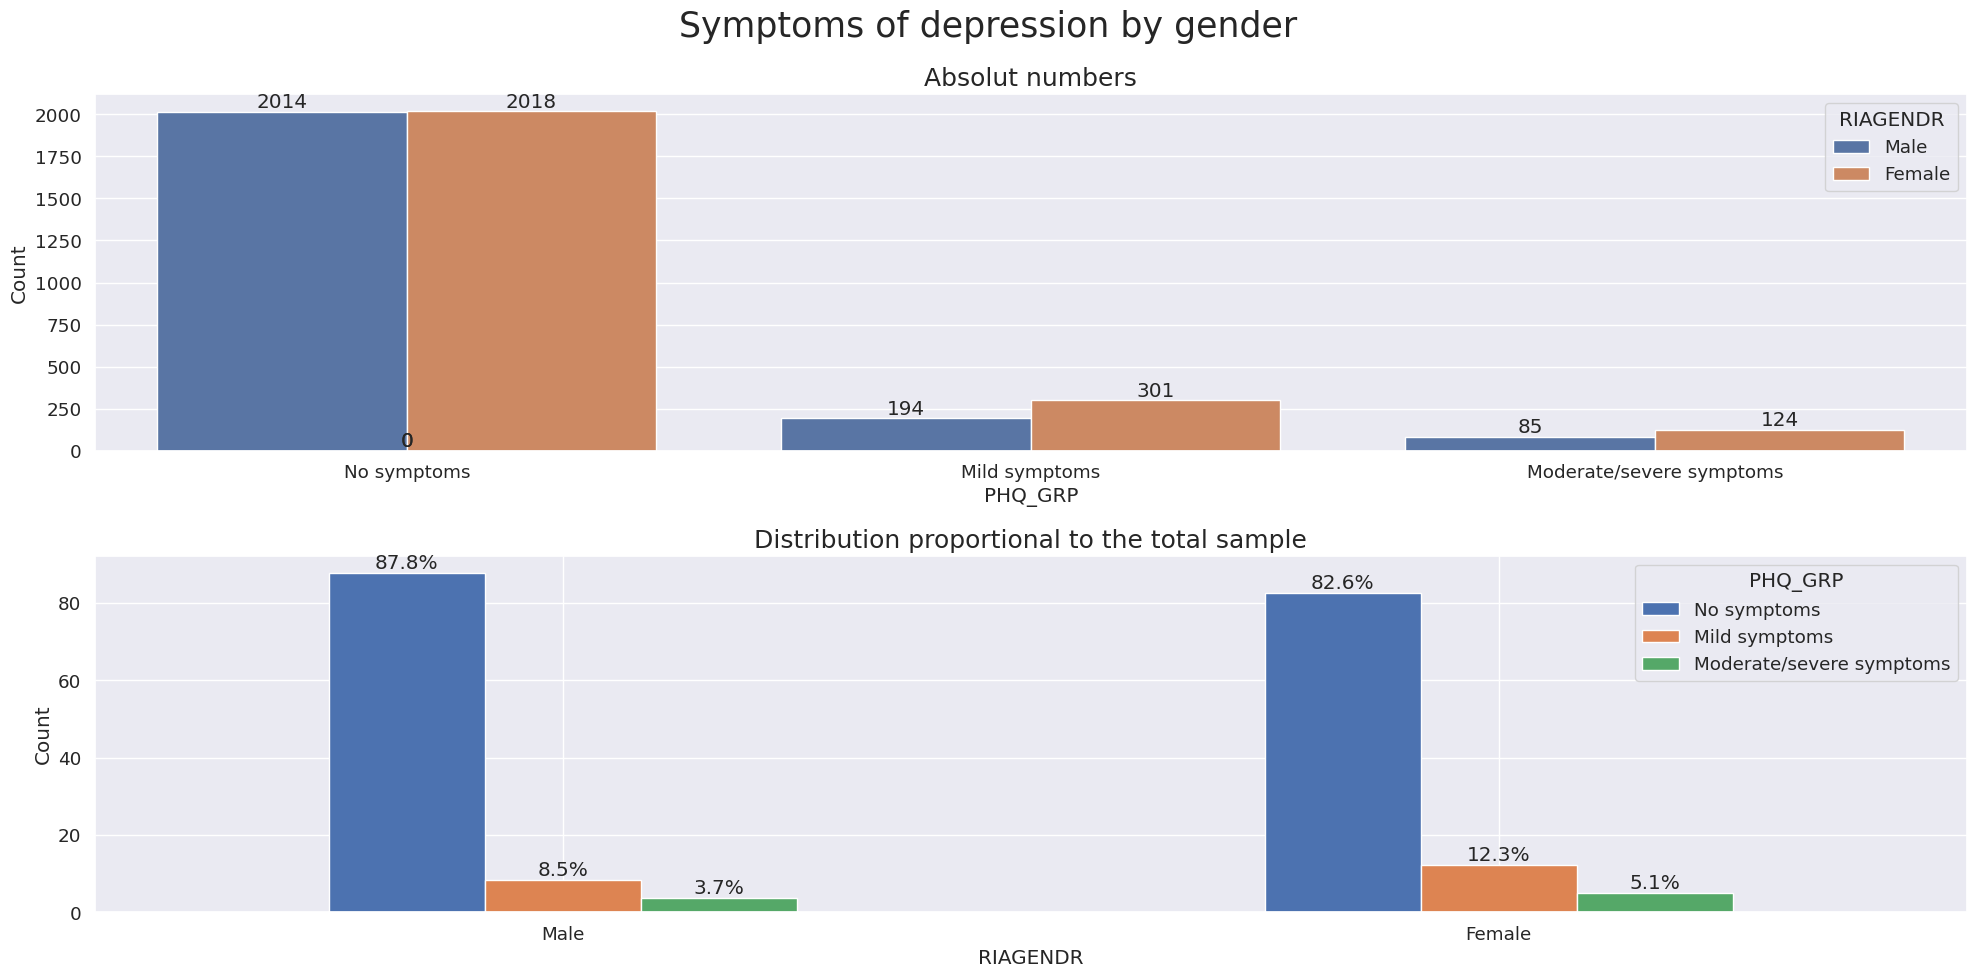

In [57]:
boxplot_graph(db2, "RIAGENDR", "PHQ9", legend_quali, tittle_quant,order_quali, 'Symptoms of depression by gender')
countplot_graph(db2,'PHQ_GRP','RIAGENDR', legend_quali, order_quali, 'Symptoms of depression by gender')

From the graphs, we can infer that there is a relationship between gender and the symptom groups, as we observe a higher proportional frequency of women with more severe symptoms compared to men.

The null hypothesis is that “the variables Gender and Depression Symptoms are not associated,” while the alternative hypothesis is that “the variables are associated.” The Chi-Square test will be applied to test the independence of the variables.

In [58]:
# Chi-Square test
df_aux = pd.crosstab(index=[db2['PHQ_GRP']], columns=[db2['RIAGENDR']])

stat, p, dof, expected = stats.chi2_contingency(df_aux)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably independent, not rejecting H0')
else: print('Probably dependent, rejecting H0')

stat=25.686, p=0.000
Probably dependent, rejecting H0


Education

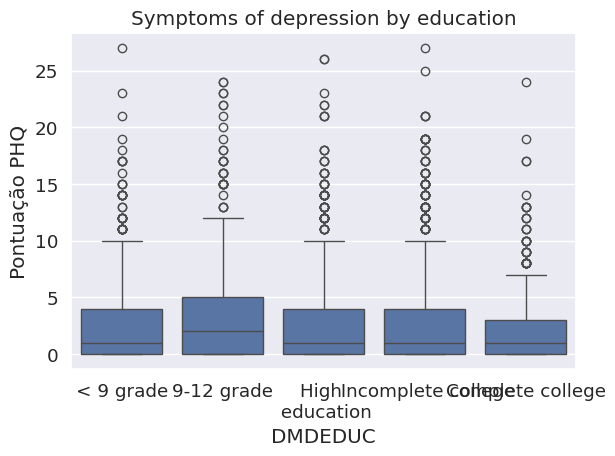

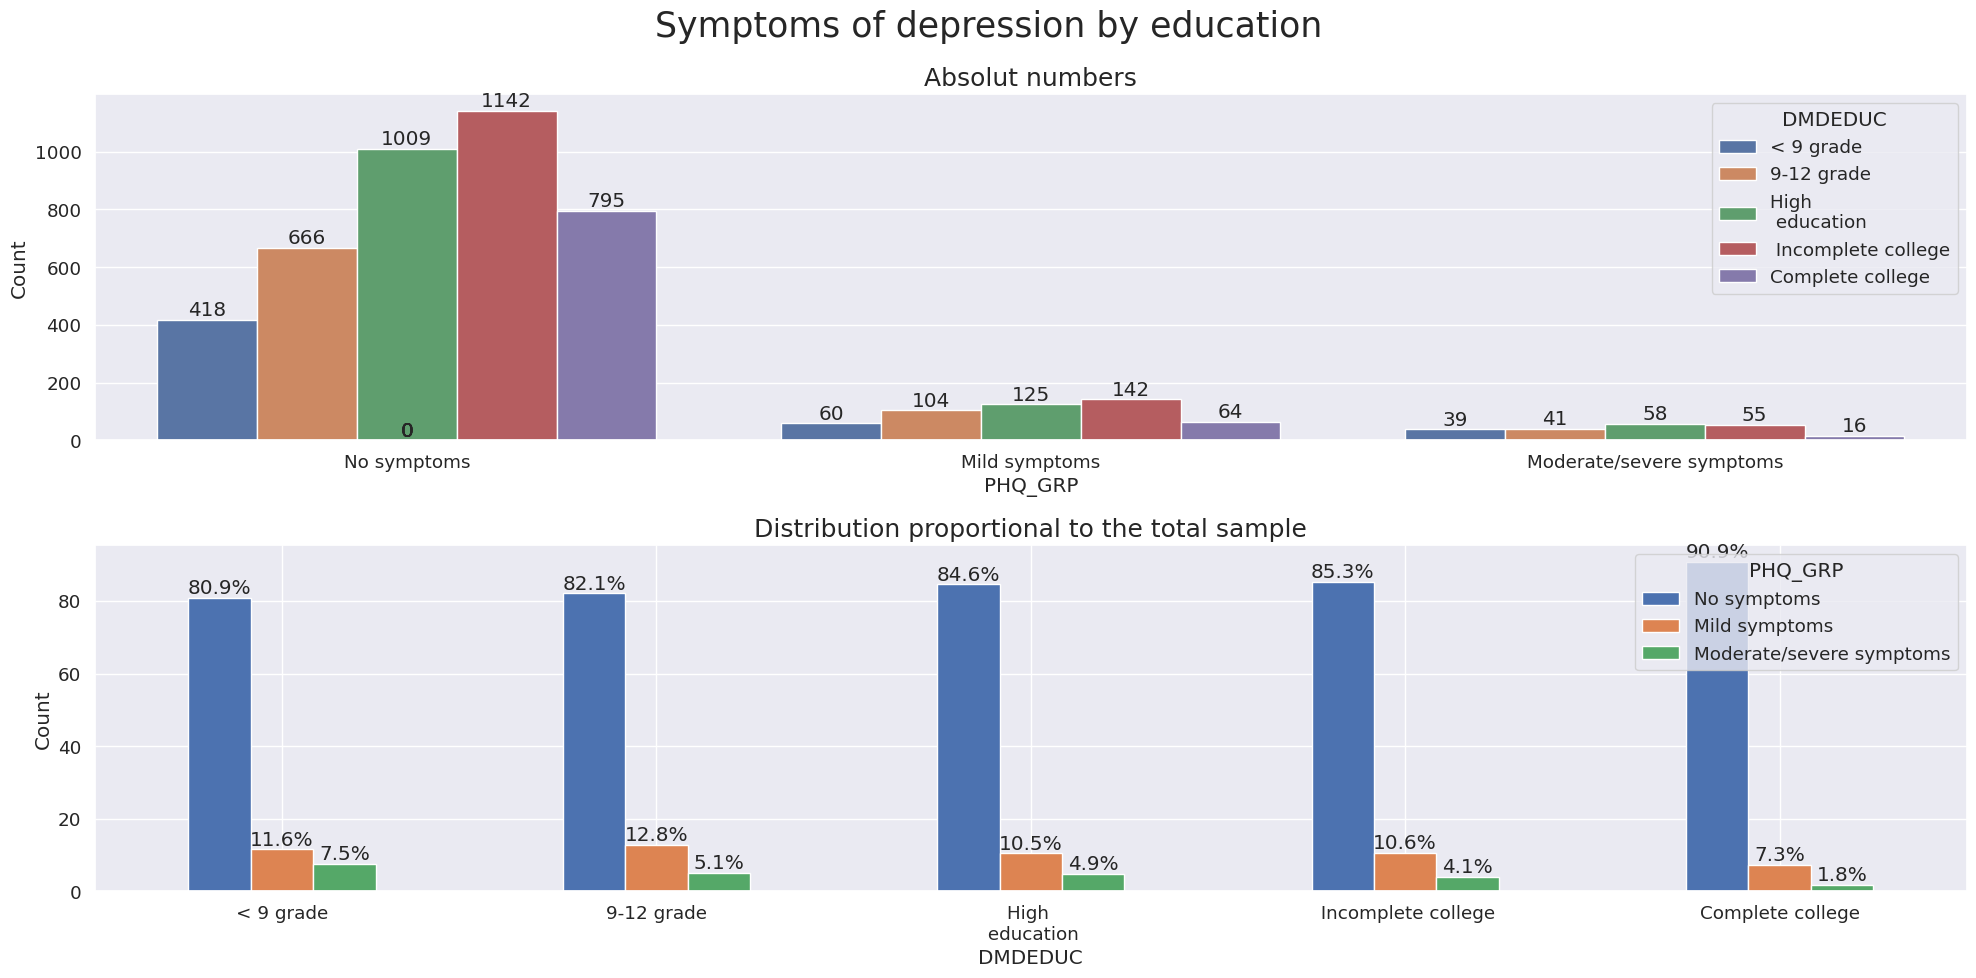

In [59]:
boxplot_graph(db2, "DMDEDUC", "PHQ9", legend_quali, tittle_quant,order_quali, 'Symptoms of depression by education')
countplot_graph(db2,'PHQ_GRP','DMDEDUC', legend_quali, order_quali, 'Symptoms of depression by education')

In [60]:
# Chi-Square test
df_aux = pd.crosstab(index=[db2['PHQ_GRP']], columns=[db2['DMDEDUC']])

stat, p, dof, expected = stats.chi2_contingency(df_aux)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably independent, not rejecting H0')
else: print('Probably dependent, rejecting H0')

stat=44.982, p=0.000
Probably dependent, rejecting H0


Ethnicity

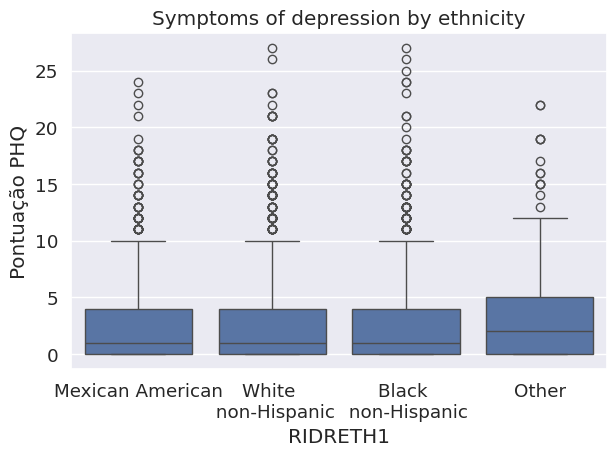

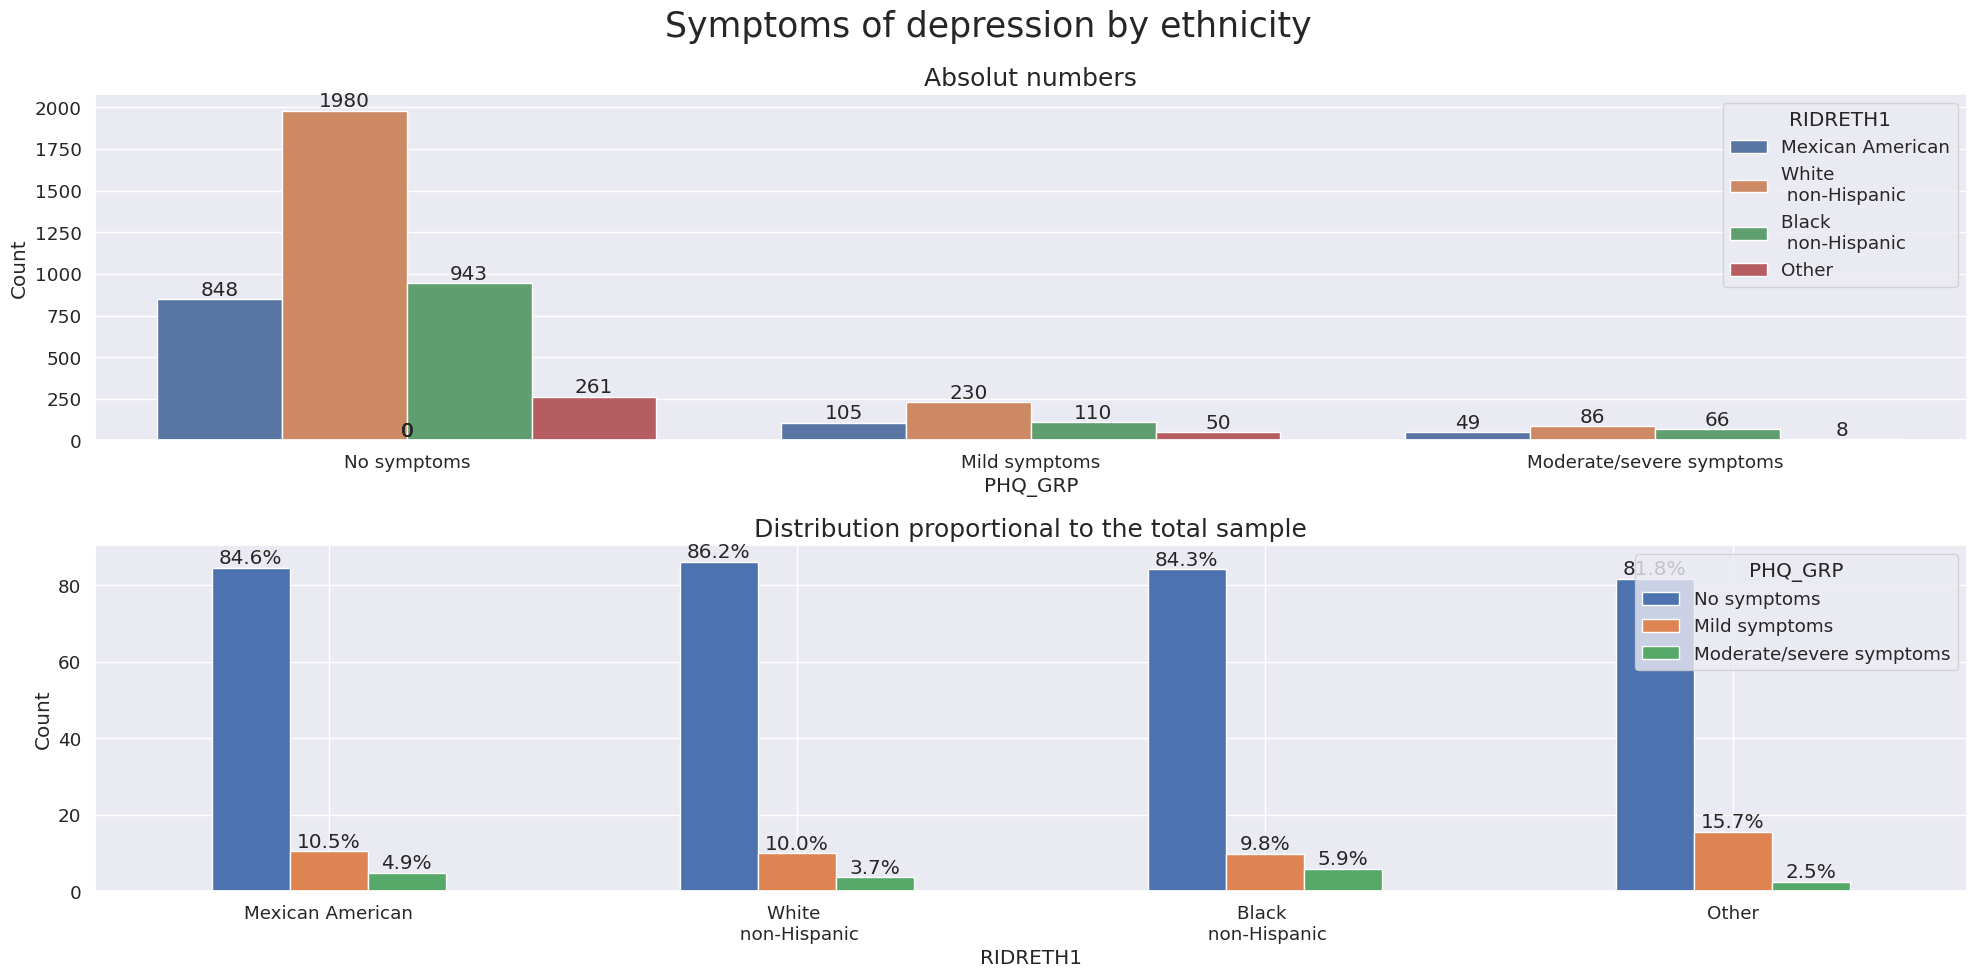

In [61]:
boxplot_graph(db2, "RIDRETH1", "PHQ9", legend_quali, tittle_quant,order_quali, 'Symptoms of depression by ethnicity')
countplot_graph(db2,'PHQ_GRP','RIDRETH1', legend_quali, order_quali, 'Symptoms of depression by ethnicity')

In [62]:
# Chi-Square test
df_aux = pd.crosstab(index=[db2['PHQ_GRP']], columns=[db2['RIDRETH1']])

stat, p, dof, expected = stats.chi2_contingency(df_aux)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably independent, not rejecting H0')
else: print('Probably dependent, rejecting H0')

stat=21.071, p=0.002
Probably dependent, rejecting H0


Thus, based on the analysis of the demographic and socio-economic characteristics and the depression symptom groups, we observe that:

•	The lower the average income of the group, the more severe the depression symptoms.

•	The female gender has a greater association with the presence of depression symptoms than the male gender.

•	The education level “Higher Education Completed,” which represents the group with the highest education, is more correlated with the absence of symptoms. The education levels “9-12 years” and “<9 years,” which represent those with the lowest education, have a stronger association with the presence of symptoms, particularly “9-12 years” with “Mild Symptoms” and “<9 years” with “Moderate-Severe Symptoms.”

•	The ethnicity ‘Other’ has a stronger association with ‘Mild Symptoms.’

•	The ethnicity ‘Non-Hispanic Black’ has a stronger association with ‘Moderate-Severe Symptoms.’

•	The ethnicity ‘Non-Hispanic White’ has a stronger association with ‘No Symptoms.’

We will compare the frequency of depression cases among the socio-economic group with the highest association with symptoms, the group with the lowest association, and our complete data sample.

We will create a function to facilitate this process, which will be repeated in the subsequent analysis of depression symptoms and healthy habits.

In [70]:
def proportion_in_sample(sample, sample_description):
    proportion = sample.value_counts(sort=False) / len(sample)

    print('In sample {} we have, out of a total of {} individuals:\n'
          '- {:.2f}% of the sample without symptoms of depression\n'
          '- {:.2f}% of the sample with mild symptoms of depression\n'
          '- {:.2f}% of the sample with moderate-severe symptoms of depression'.format(
              sample_description,
              len(sample),
              (proportion.iloc[0] * 100).round(2),
              (proportion.iloc[1] * 100).round(2),
              (proportion.iloc[2] * 100).round(2)))

sample = db2['PHQ_GRP'].dropna()
proportion_in_sample(sample, 'full data')

In sample full data we have, out of a total of 4736 individuals:
- 85.14% of the sample without symptoms of depression
- 10.45% of the sample with mild symptoms of depression
- 4.41% of the sample with moderate-severe symptoms of depression


In [72]:
sample = db2[(db2['RIAGENDR']=="Female") &
             ((db2['RIDRETH1']=='Black \n non-Hispanic') | (db2['RIDRETH1']=="Other")) &
             ((db2['DMDEDUC']=="< 9 grade") | (db2['DMDEDUC']=="9-12 grade")) &
             (db2['INDFMINC'] < 20000)]['PHQ_GRP'].dropna()
proportion_in_sample(sample, 'of the socioeconomic group with HIGHEST association with symptoms of depression')

In sample of the socioeconomic group with HIGHEST association with symptoms of depression we have, out of a total of 88 individuals:
- 72.73% of the sample without symptoms of depression
- 17.05% of the sample with mild symptoms of depression
- 10.23% of the sample with moderate-severe symptoms of depression


In [73]:
sample = db2[(db2['RIAGENDR']=="Male") &
             (db2['RIDRETH1']=='White \n non-Hispanic') &
             (db2['DMDEDUC']=="Complete college") &
             (db2['INDFMINC'] == 75000.0)]['PHQ_GRP'].dropna()
proportion_in_sample(sample, 'of the socioeconomic group with LEAST association with symptoms of depression')

In sample of the socioeconomic group with LEAST association with symptoms of depression we have, out of a total of 155 individuals:
- 98.06% of the sample without symptoms of depression
- 1.29% of the sample with mild symptoms of depression
- 0.65% of the sample with moderate-severe symptoms of depression


**Healthy Habits and Demographic Characteristics**

We will repeat the process, now assessing the possible relationship between demographic characteristics and the HEI (Healthy Eating Index) score, as well as the number of hours of physical activity per week (or the adherence group to the physical activity recommendation).

Again, the ANOVA F-test and Tukey’s Multiple Comparison Test will be applied.

Gender

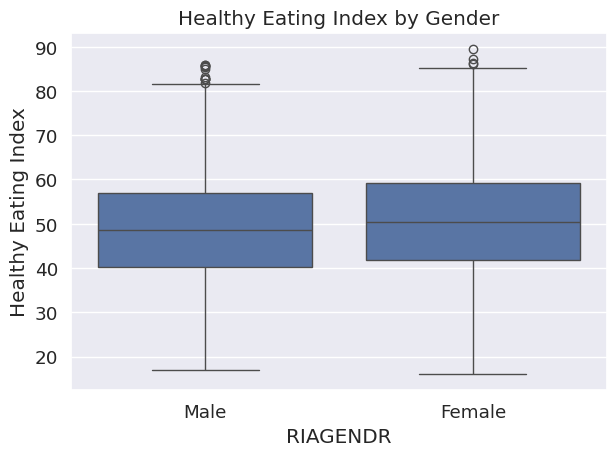

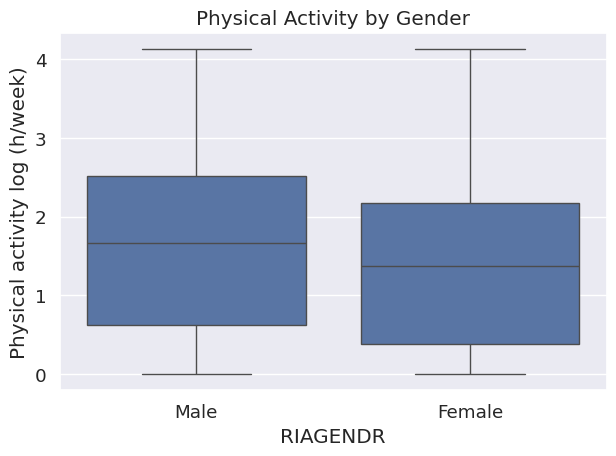

In [74]:
boxplot_graph(db2, "RIAGENDR", "HEI2015_TOTAL_SCORE", legend_quali, tittle_quant,order_quali, 'Healthy Eating Index by Gender')
boxplot_graph(db2, "RIAGENDR", "PAG_HRW_log", legend_quali, tittle_quant,order_quali, 'Physical Activity by Gender')

In [75]:
# ANOVA
df_aux = db2[["RIAGENDR", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.RIAGENDR == "Male")]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.RIAGENDR == "Female")]["HEI2015_TOTAL_SCORE"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('The means are probably equal, not rejecting H0')
else: print('The means are probably different, rejecting H0')

stat=27.216, p=0.000
The means are probably different, rejecting H0


In [76]:
# ANOVA
df_aux = db2[["RIAGENDR", "PAG_HRW_log"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.RIAGENDR == "Male")]["PAG_HRW_log"],
                         df_aux[(df_aux.RIAGENDR == "Female")]["PAG_HRW_log"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('The means are probably equal, not rejecting H0')
else: print('The means are probably different, rejecting H0')

stat=60.131, p=0.000
The means are probably different, rejecting H0


From the tests, we find that:

The average HEI score is higher for females than for males.
The average weekly physical activity time is higher for males than for females.

Ethnicity

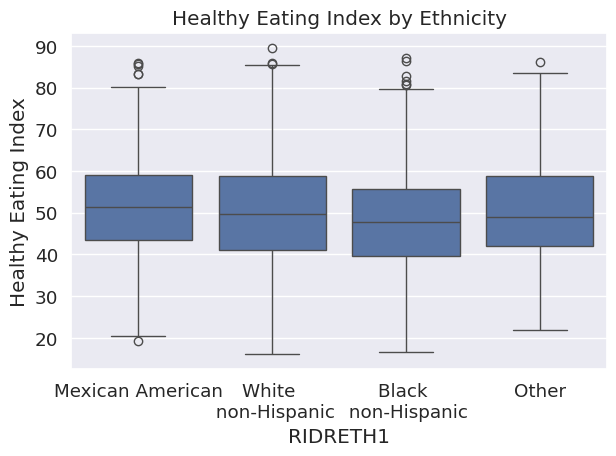

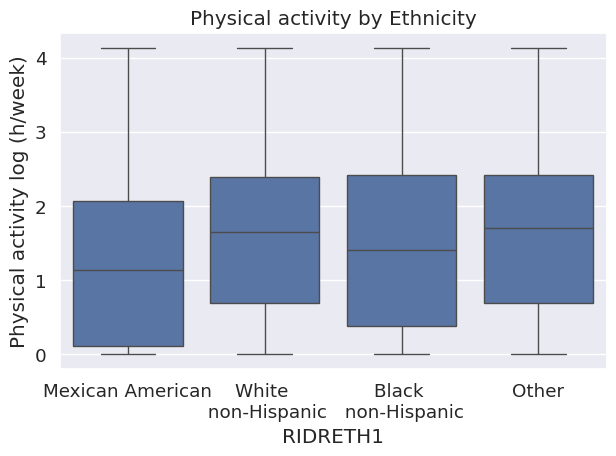

In [77]:
boxplot_graph(db2, "RIDRETH1", "HEI2015_TOTAL_SCORE", legend_quali, tittle_quant,order_quali, 'Healthy Eating Index by Ethnicity')
boxplot_graph(db2, "RIDRETH1", "PAG_HRW_log", legend_quali, tittle_quant,order_quali, 'Physical activity by Ethnicity')

In [78]:
# ANOVA
df_aux = db2[["RIDRETH1", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.RIDRETH1 == 'Mexican American')]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.RIDRETH1 == 'White \n non-Hispanic')]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.RIDRETH1 == 'Black \n non-Hispanic')]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.RIDRETH1 == "Other")]["HEI2015_TOTAL_SCORE"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably the means are equal, not rejecting H0')
else: print('Probably the means are different, rejecting H0')

stat=11.860, p=0.000
Probably the means are different, rejecting H0


In [79]:
# Tukey's Test for Multiple Comparisons
tukey = pairwise_tukeyhsd(df_aux['HEI2015_TOTAL_SCORE'],
                  df_aux['RIDRETH1'],
                  alpha = 0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------
Black 
 non-Hispanic     Mexican American   2.9767    0.0  1.6541 4.2992   True
Black 
 non-Hispanic                Other   2.0127 0.0302   0.134 3.8914   True
Black 
 non-Hispanic White 
 non-Hispanic   1.8812 0.0001  0.7696 2.9928   True
    Mexican American                Other   -0.964 0.5635 -2.8709  0.943  False
    Mexican American White 
 non-Hispanic  -1.0955 0.0717 -2.2543 0.0632  False
               Other White 
 non-Hispanic  -0.1315 0.9975 -1.8988 1.6357  False
-------------------------------------------------------------------------------


In [80]:
# ANOVA
df_aux = db2[["RIDRETH1", "PAG_HRW_log"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.RIDRETH1 == 'Mexican American')]["PAG_HRW_log"],
                         df_aux[(df_aux.RIDRETH1 == 'White \n non-Hispanic')]["PAG_HRW_log"],
                         df_aux[(df_aux.RIDRETH1 == 'Black \n non-Hispanic')]["PAG_HRW_log"],
                         df_aux[(df_aux.RIDRETH1 == "Other")]["PAG_HRW_log"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably the means are equal, not rejecting H0')
else: print('Probably the means are different, rejecting H0')

stat=25.826, p=0.000
Probably the means are different, rejecting H0


In [81]:
# Tukey's Test for Multiple Comparisons
tukey = pairwise_tukeyhsd(df_aux['PAG_HRW_log'],
                  df_aux['RIDRETH1'],
                  alpha = 0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
Black 
 non-Hispanic     Mexican American  -0.2257    0.0 -0.3433 -0.1081   True
Black 
 non-Hispanic                Other   0.1332 0.1742 -0.0347  0.3011  False
Black 
 non-Hispanic White 
 non-Hispanic   0.1185 0.0112  0.0196  0.2173   True
    Mexican American                Other   0.3589    0.0  0.1882  0.5296   True
    Mexican American White 
 non-Hispanic   0.3442    0.0  0.2407  0.4477   True
               Other White 
 non-Hispanic  -0.0147 0.9952  -0.173  0.1437  False
--------------------------------------------------------------------------------


From the tests, we find that:

The average HEI score is lower for the “Non-Hispanic Black” ethnicity compared to the others.
The average weekly physical activity time is lower for the “Mexican American” ethnicity compared to the others.

Age

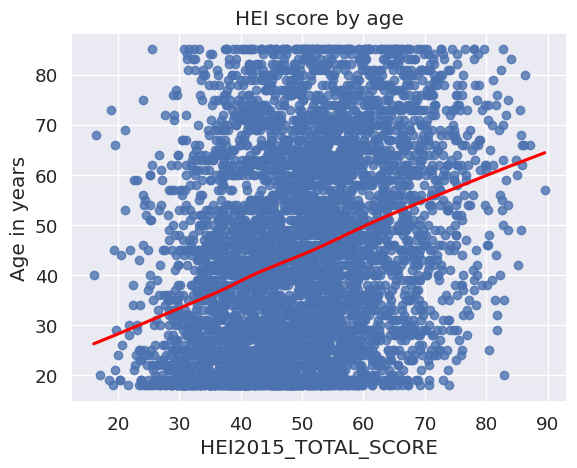

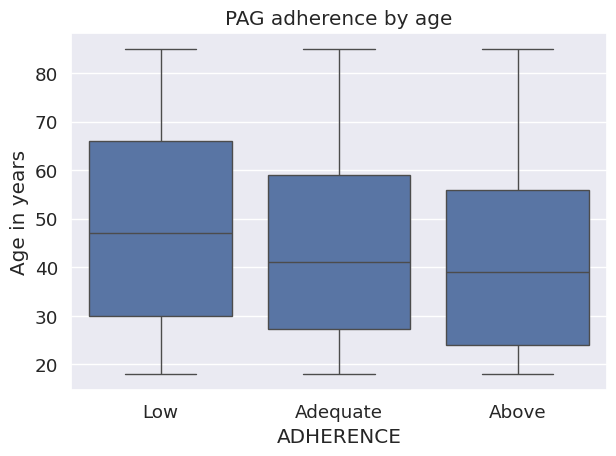

In [82]:
sns.regplot(x = 'HEI2015_TOTAL_SCORE',
            y = 'RIDAGEYR',
            lowess=True,
            line_kws={'color': 'red'},
            data = db2.replace(legend_quali),)
plt.title('HEI score by age')
plt.ylabel(tittle_quant['RIDAGEYR'])
plt.show()

boxplot_graph(db2, "ADHERENCE", "RIDAGEYR", legend_quali, tittle_quant, order_quali, 'PAG adherence by age')

In [83]:
# Pearson Correlation Test
df_aux = db2[["HEI2015_TOTAL_SCORE", "RIDAGEYR"]].dropna()

stat, p = stats.pearsonr(df_aux["HEI2015_TOTAL_SCORE"], df_aux["RIDAGEYR"])
print('stat=%.4f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably independent, not rejecting H0')
else: print('Probably dependent, rejecting H0')

stat=0.2998, p=0.000
Probably dependent, rejecting H0


In [84]:
# ANOVA
df_aux = db2[["ADHERENCE", "RIDAGEYR"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.ADHERENCE == 'Low')]["RIDAGEYR"],
                         df_aux[(df_aux.ADHERENCE == 'Adequate')]["RIDAGEYR"],
                         df_aux[(df_aux.ADHERENCE == 'Above')]["RIDAGEYR"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably the means are equal, not rejecting H0')
else: print('Probably the means are different, rejecting H0')

stat=80.463, p=0.000
Probably the means are different, rejecting H0


In [85]:
# Tukey's Test for Multiple Comparisons
tukey = pairwise_tukeyhsd(df_aux['RIDAGEYR'],
                  df_aux['ADHERENCE'],
                  alpha = 0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
   Above Adequate   2.3792 0.0091 0.4862 4.2722   True
   Above      Low   7.4257    0.0 6.0377 8.8137   True
Adequate      Low   5.0465    0.0 3.1657 6.9273   True
------------------------------------------------------


From the tests and graphical analyses, we find that:

There is a positive correlation between HEI score and age, indicating that older people tend to have healthier eating habits.
Weekly physical activity time tends to decrease with age.

Income

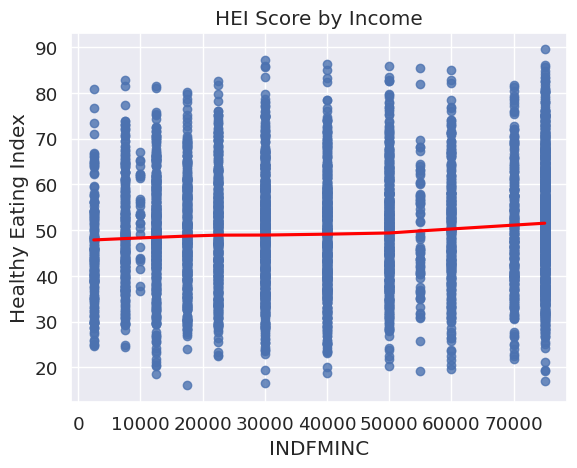

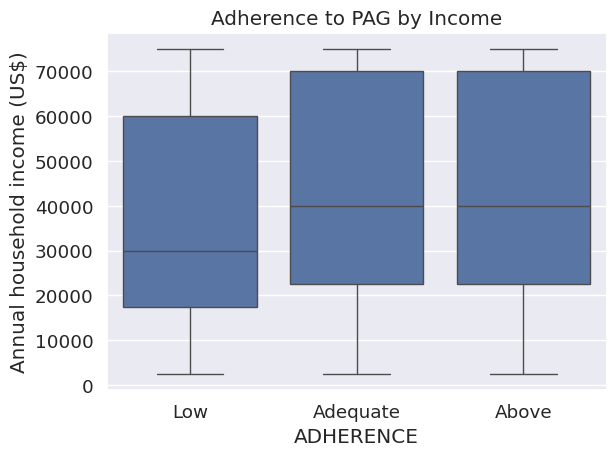

In [86]:
sns.regplot(x = 'INDFMINC',
            y = 'HEI2015_TOTAL_SCORE',
            lowess=True,
            line_kws={'color': 'red'},
            data = db2.replace(legend_quali),)
plt.title('HEI Score by Income')
plt.ylabel(tittle_quant['HEI2015_TOTAL_SCORE'])
plt.show()
boxplot_graph(db2, "ADHERENCE", "INDFMINC", legend_quali,tittle_quant,order_quali, 'Adherence to PAG by Income')

In [87]:
# Pearson Correlation Test
df_aux = db2[["HEI2015_TOTAL_SCORE", "INDFMINC"]].dropna()

stat, p = stats.pearsonr(df_aux["HEI2015_TOTAL_SCORE"], df_aux["INDFMINC"])
print('stat=%.4f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably independent, not rejecting H0')
else: print('Probably dependent, rejecting H0')

stat=0.0947, p=0.000
Probably dependent, rejecting H0


In [88]:
# ANOVA
df_aux = db2[["ADHERENCE", "INDFMINC"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.ADHERENCE == 'Low')]["INDFMINC"],
                         df_aux[(df_aux.ADHERENCE == 'Adequate')]["INDFMINC"],
                         df_aux[(df_aux.ADHERENCE == 'Above')]["INDFMINC"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably the means are equal, not rejecting H0')
else: print('Probably the means are different, rejecting H0')

stat=44.185, p=0.000
Probably the means are different, rejecting H0


In [89]:
# Tukey's Test for Multiple Comparisons
tukey = pairwise_tukeyhsd(df_aux['INDFMINC'],
                  df_aux['ADHERENCE'],
                  alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
   Above Adequate  1438.9323 0.3125  -878.3468  3756.2114  False
   Above      Low -5880.4658    0.0 -7588.8004 -4172.1312   True
Adequate      Low -7319.3981    0.0 -9627.8441  -5010.952   True
----------------------------------------------------------------


From the tests and graphical analyses, we find that:

There is a slight positive correlation between HEI score and income, indicating that people with higher incomes tend to have slightly healthier eating habits.
People who do not meet the recommended exercise levels have, on average, lower incomes than those who meet or exceed the recommended physical activity levels.

Education

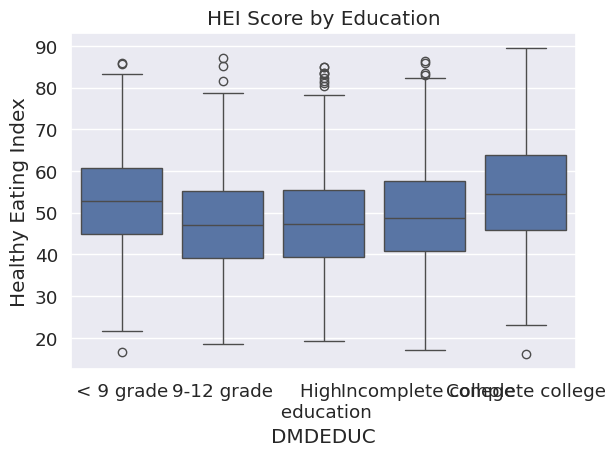

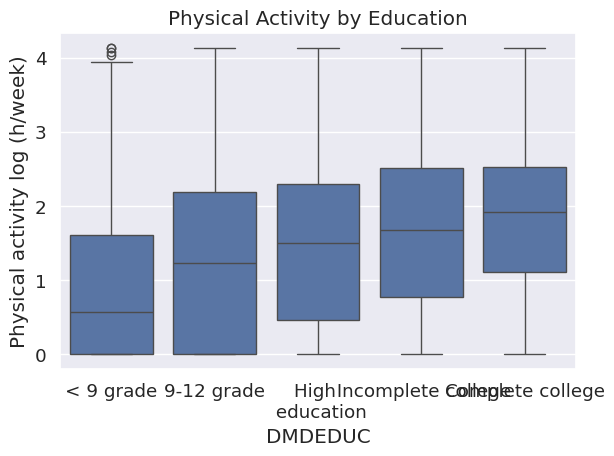

In [90]:
boxplot_graph(db2, "DMDEDUC", "HEI2015_TOTAL_SCORE", legend_quali, tittle_quant,order_quali, 'HEI Score by Education')
boxplot_graph(db2, "DMDEDUC", "PAG_HRW_log", legend_quali, tittle_quant,order_quali, 'Physical Activity by Education')

In [91]:
# ANOVA
df_aux = db2[["DMDEDUC", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.DMDEDUC == "< 9 grade")]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.DMDEDUC == "9-12 grade")]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.DMDEDUC == "High \n education")]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.DMDEDUC == " Incomplete college")]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.DMDEDUC == "Complete college")]["HEI2015_TOTAL_SCORE"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably the means are equal, not rejecting H0')
else: print('Probably the means are different, rejecting H0')

stat=64.987, p=0.000
Probably the means are different, rejecting H0


In [92]:
# Tukey's Test for Multiple Comparisons
tukey = pairwise_tukeyhsd(df_aux['HEI2015_TOTAL_SCORE'],
                  df_aux['DMDEDUC'],
                  alpha = 0.05)
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
       group1            group2      meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------------
 Incomplete college       9-12 grade  -1.7693 0.0054 -3.1759 -0.3628   True
 Incomplete college        < 9 grade   3.6118    0.0   1.976  5.2475   True
 Incomplete college Complete college   5.5547    0.0  4.1578  6.9516   True
 Incomplete college High 
 education  -1.3741 0.0248 -2.6356 -0.1126   True
         9-12 grade        < 9 grade   5.3811    0.0  3.6084  7.1538   True
         9-12 grade Complete college    7.324    0.0   5.769   8.879   True
         9-12 grade High 
 education   0.3952 0.9441 -1.0394  1.8299  False
          < 9 grade Complete college   1.9429 0.0225  0.1779   3.708   True
          < 9 grade High 
 education  -4.9858    0.0 -6.6458 -3.3259   True
   Complete college High 
 education  -6.9288    0.0 -8.3539 -5.5036   True
------------

In [93]:
# ANOVA

df_aux = db2[["DMDEDUC", "PAG_HRW_log"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.DMDEDUC == "< 9 grade")]["PAG_HRW_log"],
                   df_aux[(df_aux.DMDEDUC == "9-12 grade")]["PAG_HRW_log"],
                   df_aux[(df_aux.DMDEDUC == "High \n education")]["PAG_HRW_log"],
                   df_aux[(df_aux.DMDEDUC == " Incomplete college")]["PAG_HRW_log"],
                   df_aux[(df_aux.DMDEDUC == "Complete college")]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably the means are equal, not rejecting H0')
else: print('Probably the means are different, rejecting H0')

stat=75.391, p=0.000
Probably the means are different, rejecting H0


In [94]:
# Tukey's Test for Multiple Comparisons
tukey = pairwise_tukeyhsd(df_aux['PAG_HRW_log'],
                  df_aux['DMDEDUC'],
                  alpha = 0.05)
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
       group1            group2      meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------------
 Incomplete college       9-12 grade  -0.3226    0.0  -0.448 -0.1971   True
 Incomplete college        < 9 grade  -0.7697    0.0 -0.9136 -0.6257   True
 Incomplete college Complete college   0.1208 0.0651 -0.0045  0.2461  False
 Incomplete college High 
 education  -0.1848 0.0001 -0.2981 -0.0715   True
         9-12 grade        < 9 grade  -0.4471    0.0 -0.6031 -0.2911   True
         9-12 grade Complete college   0.4433    0.0  0.3043  0.5824   True
         9-12 grade High 
 education   0.1378 0.0282  0.0094  0.2661   True
          < 9 grade Complete college   0.8904    0.0  0.7345  1.0464   True
          < 9 grade High 
 education   0.5849    0.0  0.4384  0.7313   True
   Complete college High 
 education  -0.3056    0.0 -0.4338 -0.1774   True
------------

From the tests and graphical analyses, we find that:

There is a difference in the average HEI score across education levels, with higher education levels generally associated with higher HEI scores, except for the “<9th grade” group, which surprisingly has the second highest average HEI score.
Weekly physical activity time, however, follows the order of education level, increasing as education level increases.

HEI Score:

•	Higher in females than in males.

•	Lower for the “Non-Hispanic Black” ethnicity compared to others.

•	Positively correlated with age, meaning older individuals tend to have healthier eating habits.

•	Positively correlated with income, meaning people with higher incomes tend to eat more healthily.

•	Increases with education level, except for the “<9th grade” group, which surprisingly has the second-highest average HEI score.


Weekly Physical Activity Time:

•	Higher in males than in females.

•	Lower in the “Mexican American” ethnicity compared to others.

•	Tends to decrease with age.

•	People who do not meet the recommended activity levels generally have lower incomes than those who meet or exceed the recommendation.

•	Increases with education level, with higher weekly activity associated with higher levels of education.

**Symptoms of Depression and Healthy Habits**

Physical Activity

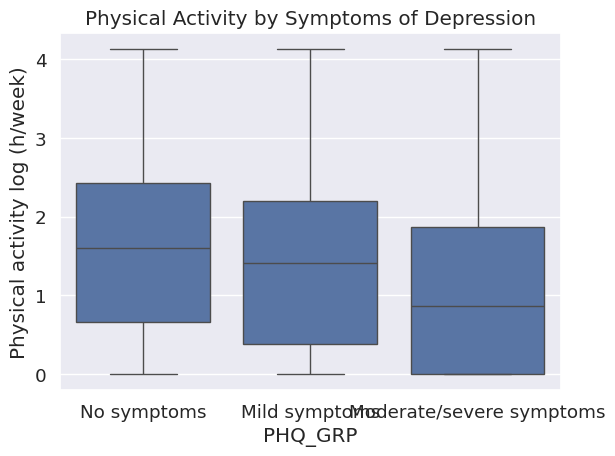

In [95]:
boxplot_graph(db2, 'PHQ_GRP',"PAG_HRW_log", legend_quali, tittle_quant,order_quali, 'Physical Activity by Symptoms of Depression')

In [96]:
# ANOVA
df_aux = db2[["PHQ_GRP", "PAG_HRW_log"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.PHQ_GRP == "No symptoms")]["PAG_HRW_log"],
                         df_aux[(df_aux.PHQ_GRP == "Mild symptoms")]["PAG_HRW_log"],
                         df_aux[(df_aux.PHQ_GRP == "Moderate/severe symptoms")]["PAG_HRW_log"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably the means are equal, not rejecting H0')
else: print('Probably the means are different, rejecting H0')

stat=24.994, p=0.000
Probably the means are different, rejecting H0


In [97]:
# Tukey's Test for Multiple Comparisons
tukey = pairwise_tukeyhsd(df_aux['PAG_HRW_log'],
                  df_aux['PHQ_GRP'],
                  alpha = 0.05)
print(tukey)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
           Mild symptoms Moderate/severe symptoms   -0.369 0.0002 -0.5858 -0.1522   True
           Mild symptoms              No symptoms   0.1577 0.0088  0.0326  0.2829   True
Moderate/severe symptoms              No symptoms   0.5267    0.0  0.3403  0.7132   True
----------------------------------------------------------------------------------------


There is a clear association between depression symptom groups and weekly physical activity time, where those with more severe depression symptoms are also those who engage in less physical exercise.

Healthy Eating Index (HEI)

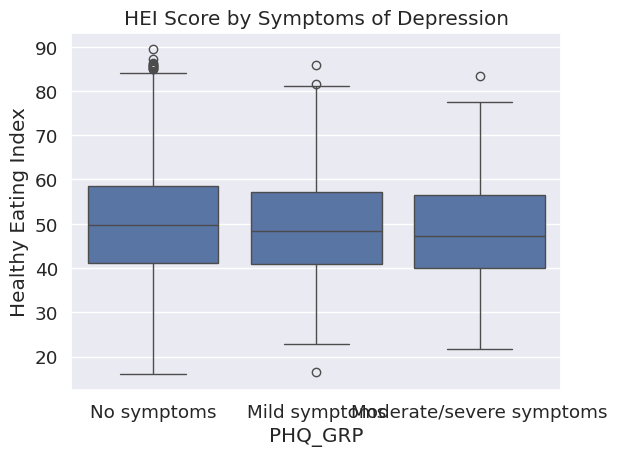

In [98]:
boxplot_graph(db2, 'PHQ_GRP',"HEI2015_TOTAL_SCORE", legend_quali, tittle_quant,order_quali, 'HEI Score by Symptoms of Depression')

In [99]:
# ANOVA
df_aux = db2[["PHQ_GRP", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.PHQ_GRP == "No symptoms")]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.PHQ_GRP == "Mild symptoms")]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.PHQ_GRP == "Moderate/severe symptoms")]["HEI2015_TOTAL_SCORE"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Probably the means are equal, not rejecting H0')
else: print('Probably the means are different, rejecting H0')

stat=2.931, p=0.053
Probably the means are equal, not rejecting H0


In [100]:
# Tukey's Test for Multiple Comparisons
tukey = pairwise_tukeyhsd(df_aux['HEI2015_TOTAL_SCORE'],
                  df_aux['PHQ_GRP'],
                  alpha = 0.05)
print(tukey)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                   group2          meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
           Mild symptoms Moderate/severe symptoms  -0.7155 0.7701 -3.1513 1.7202  False
           Mild symptoms              No symptoms    0.979 0.2286 -0.4197 2.3778  False
Moderate/severe symptoms              No symptoms   1.6945 0.1405 -0.4029  3.792  False
---------------------------------------------------------------------------------------


Regarding diet, we see that the average HEI score is significantly lower for the group with moderate to severe depression symptoms.

For the group with mild symptoms, the average is lower than that of the group without symptoms; however, this difference is not statistically significant, so we cannot conclude that they generally have a lower score.

We will also evaluate potential relationships between each specific dietary habit category and depression symptoms by plotting the cases where the categories are not independent.

Total Vegetables - HEI2015C1_TOTALVEG
stat=13.140, p=0.011
Probably dependent, rejecting H0



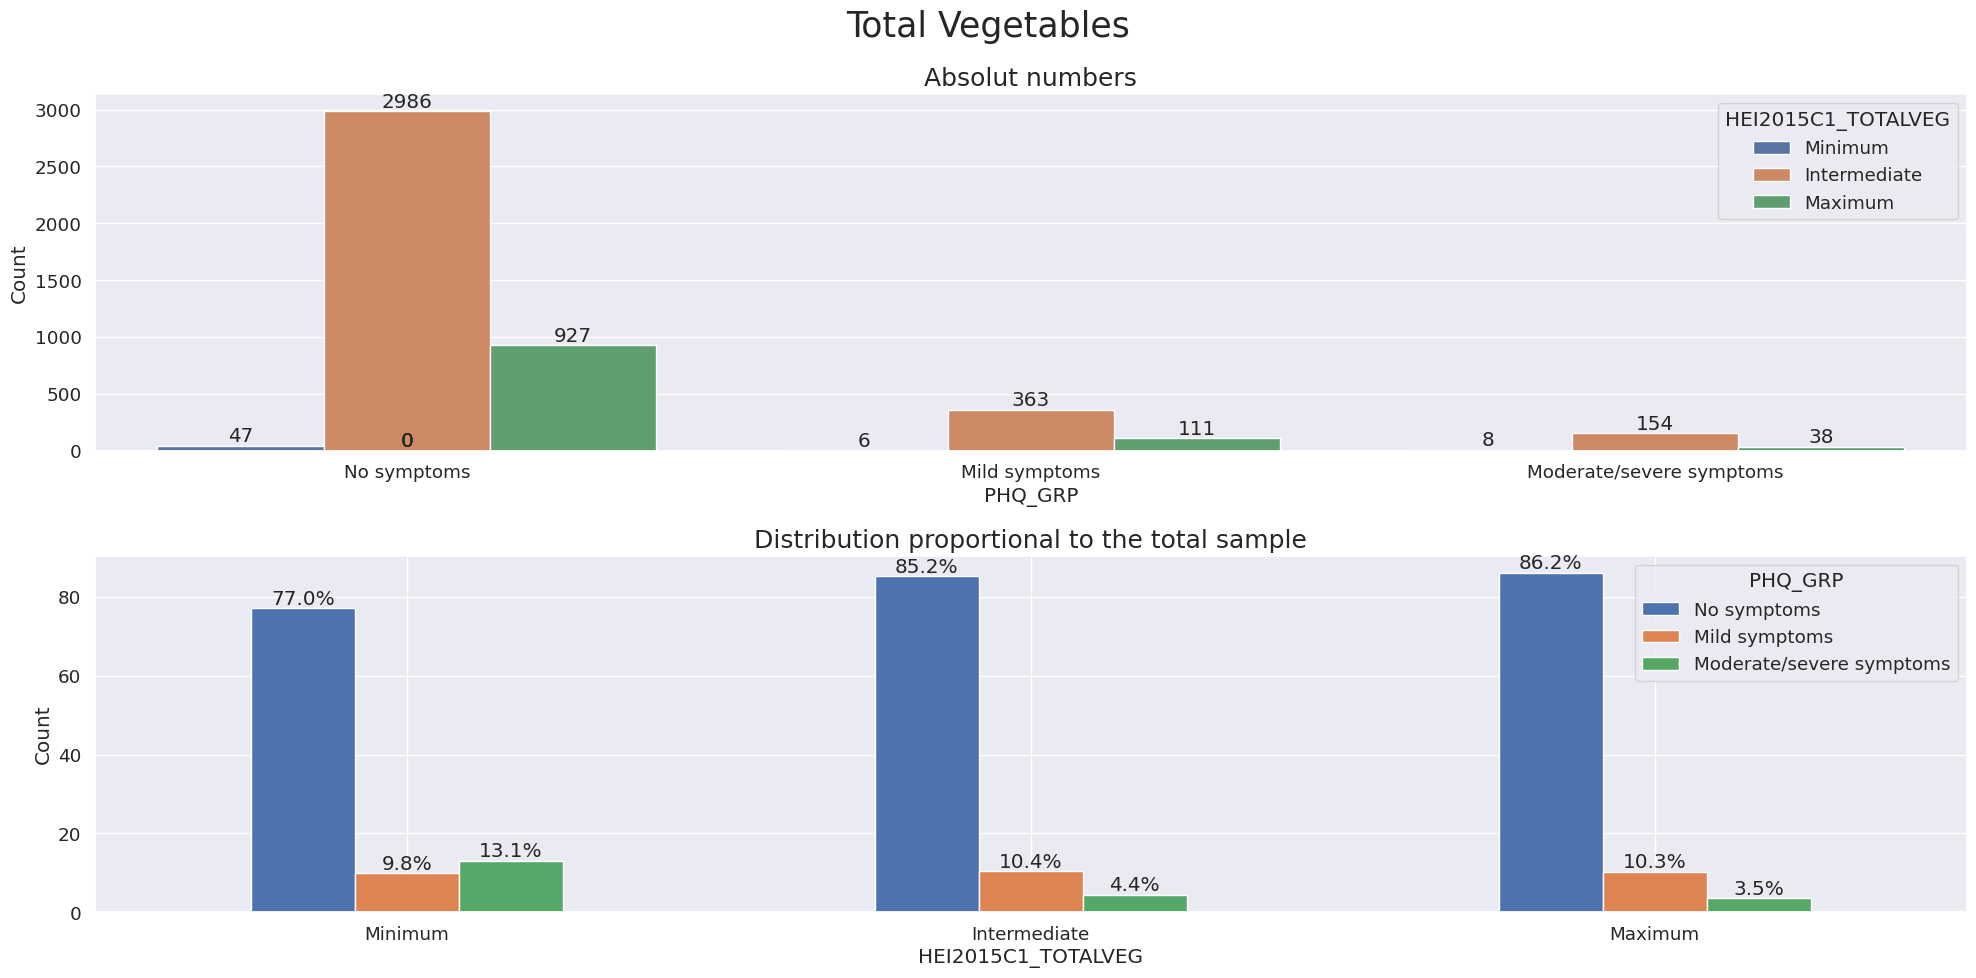

------------------------------------------------------------
Dark green vegetables and legumes  - HEI2015C2_GREEN_AND_BEAN
stat=2.704, p=0.609
Probably independent, not rejecting H0

------------------------------------------------------------
Total fruits - HEI2015C3_TOTALFRUIT
stat=10.910, p=0.028
Probably dependent, rejecting H0



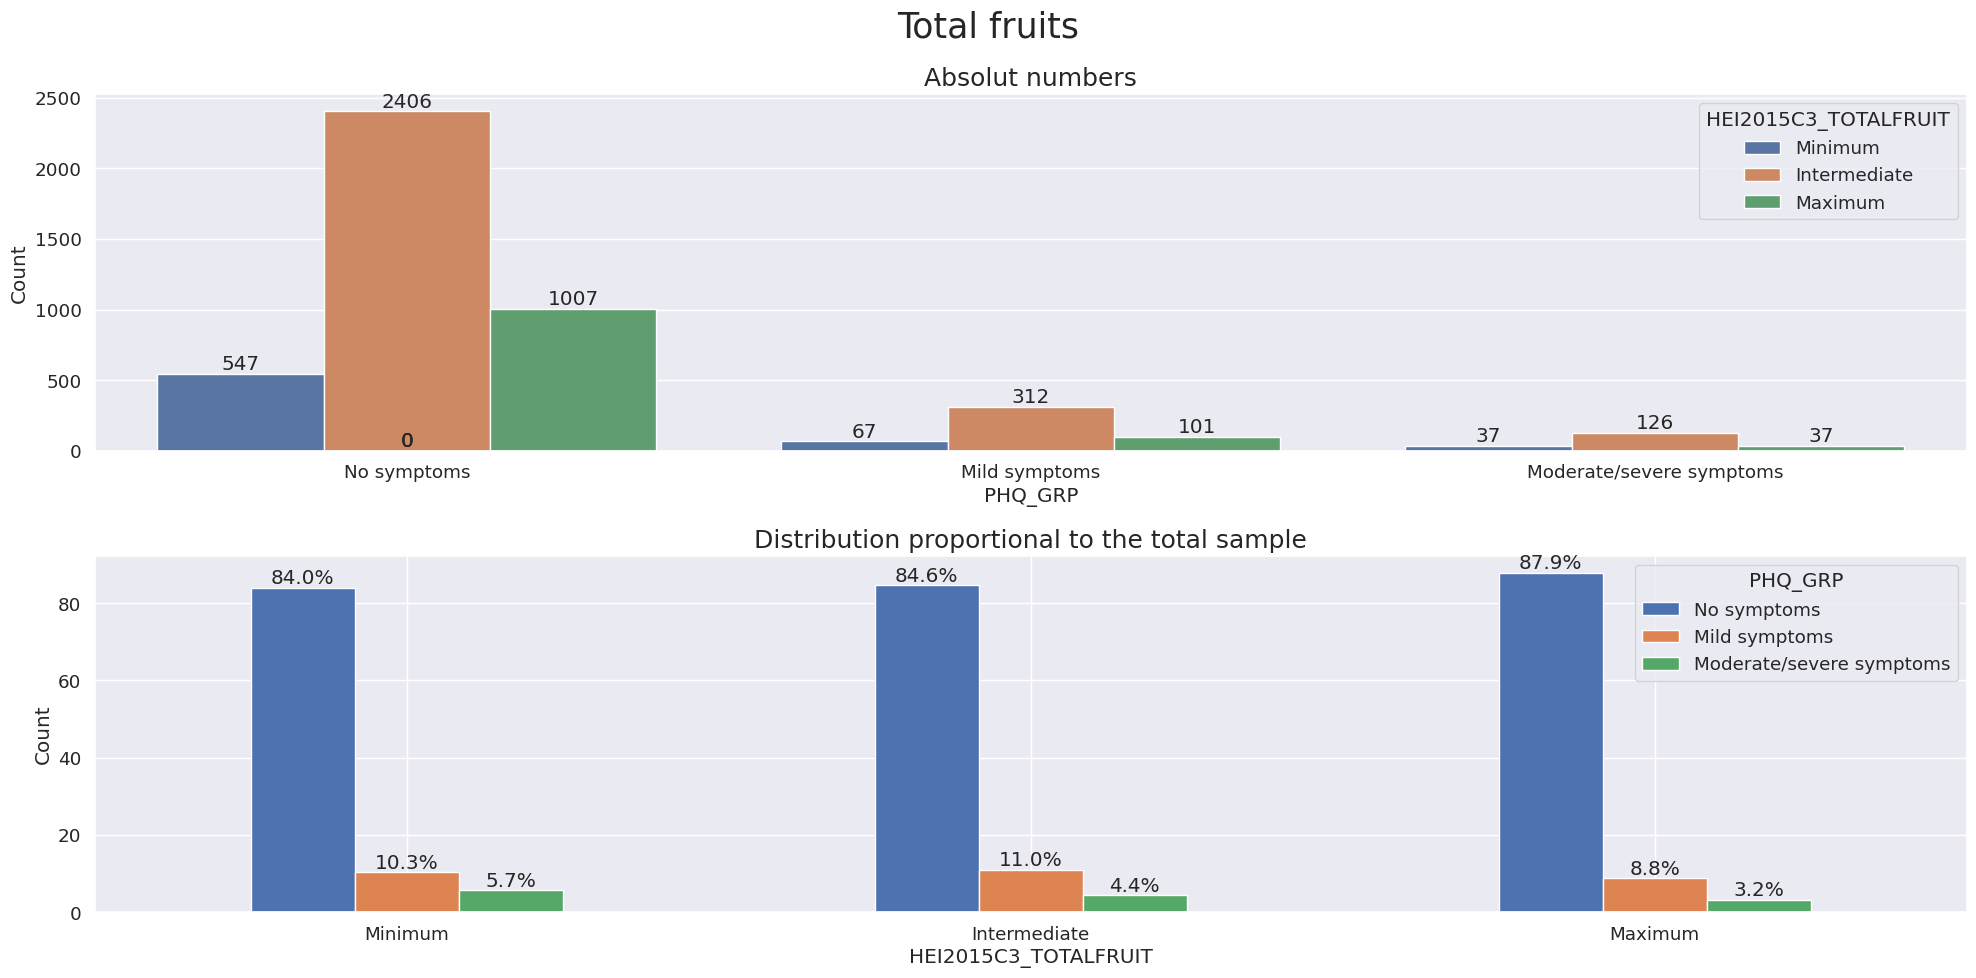

------------------------------------------------------------
Fruits in natura - HEI2015C4_WHOLEFRUIT
stat=4.884, p=0.299
Probably independent, not rejecting H0

------------------------------------------------------------
Whole grains - HEI2015C5_WHOLEGRAIN
stat=15.233, p=0.004
Probably dependent, rejecting H0



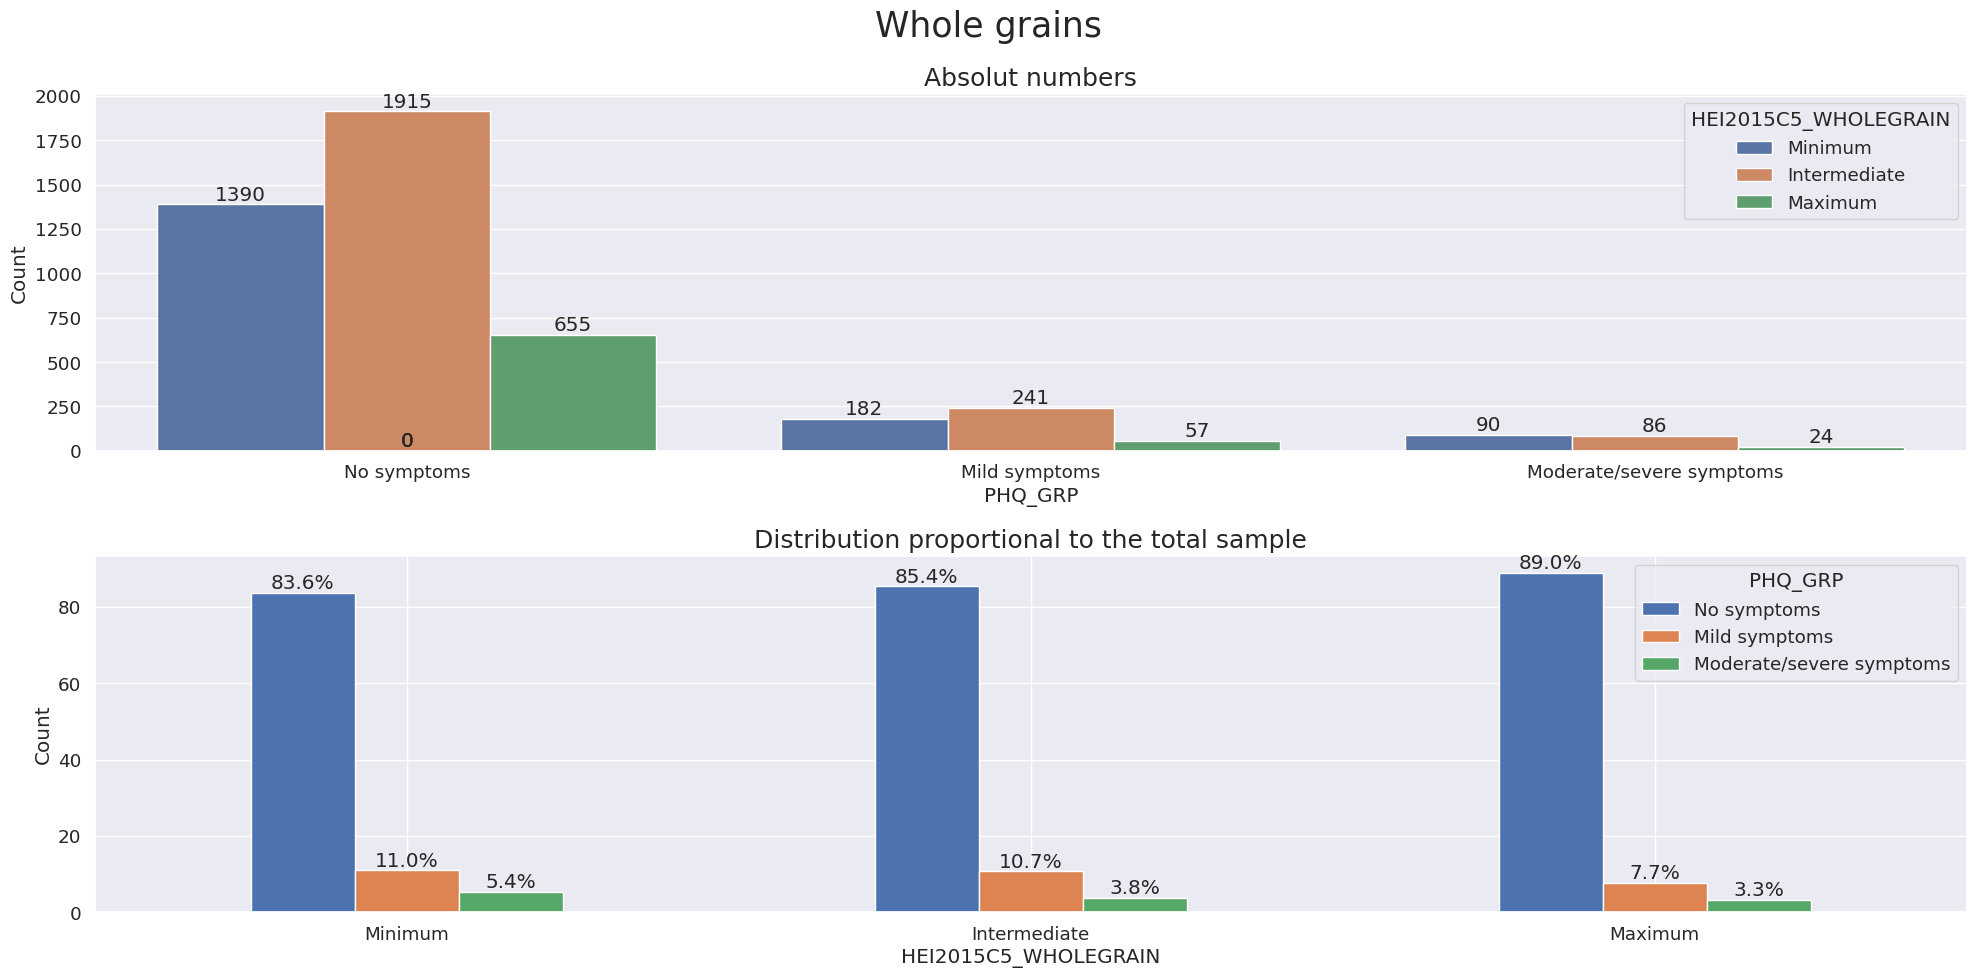

------------------------------------------------------------
Dairy - HEI2015C6_TOTALDAIRY
stat=1.176, p=0.882
Probably independent, not rejecting H0

------------------------------------------------------------
Proteins - HEI2015C7_TOTPROT
stat=5.339, p=0.254
Probably independent, not rejecting H0

------------------------------------------------------------
Sea plants and plant proteins - HEI2015C8_SEAPLANT_PROT
stat=5.391, p=0.249
Probably independent, not rejecting H0

------------------------------------------------------------
Fatty acid - HEI2015C9_FATTYACID
stat=4.465, p=0.347
Probably independent, not rejecting H0

------------------------------------------------------------
Sodium - HEI2015C10_SODIUM
stat=2.654, p=0.617
Probably independent, not rejecting H0

------------------------------------------------------------
Refined grains - HEI2015C11_REFINEDGRAIN
stat=4.690, p=0.321
Probably independent, not rejecting H0

-----------------------------------------------------------

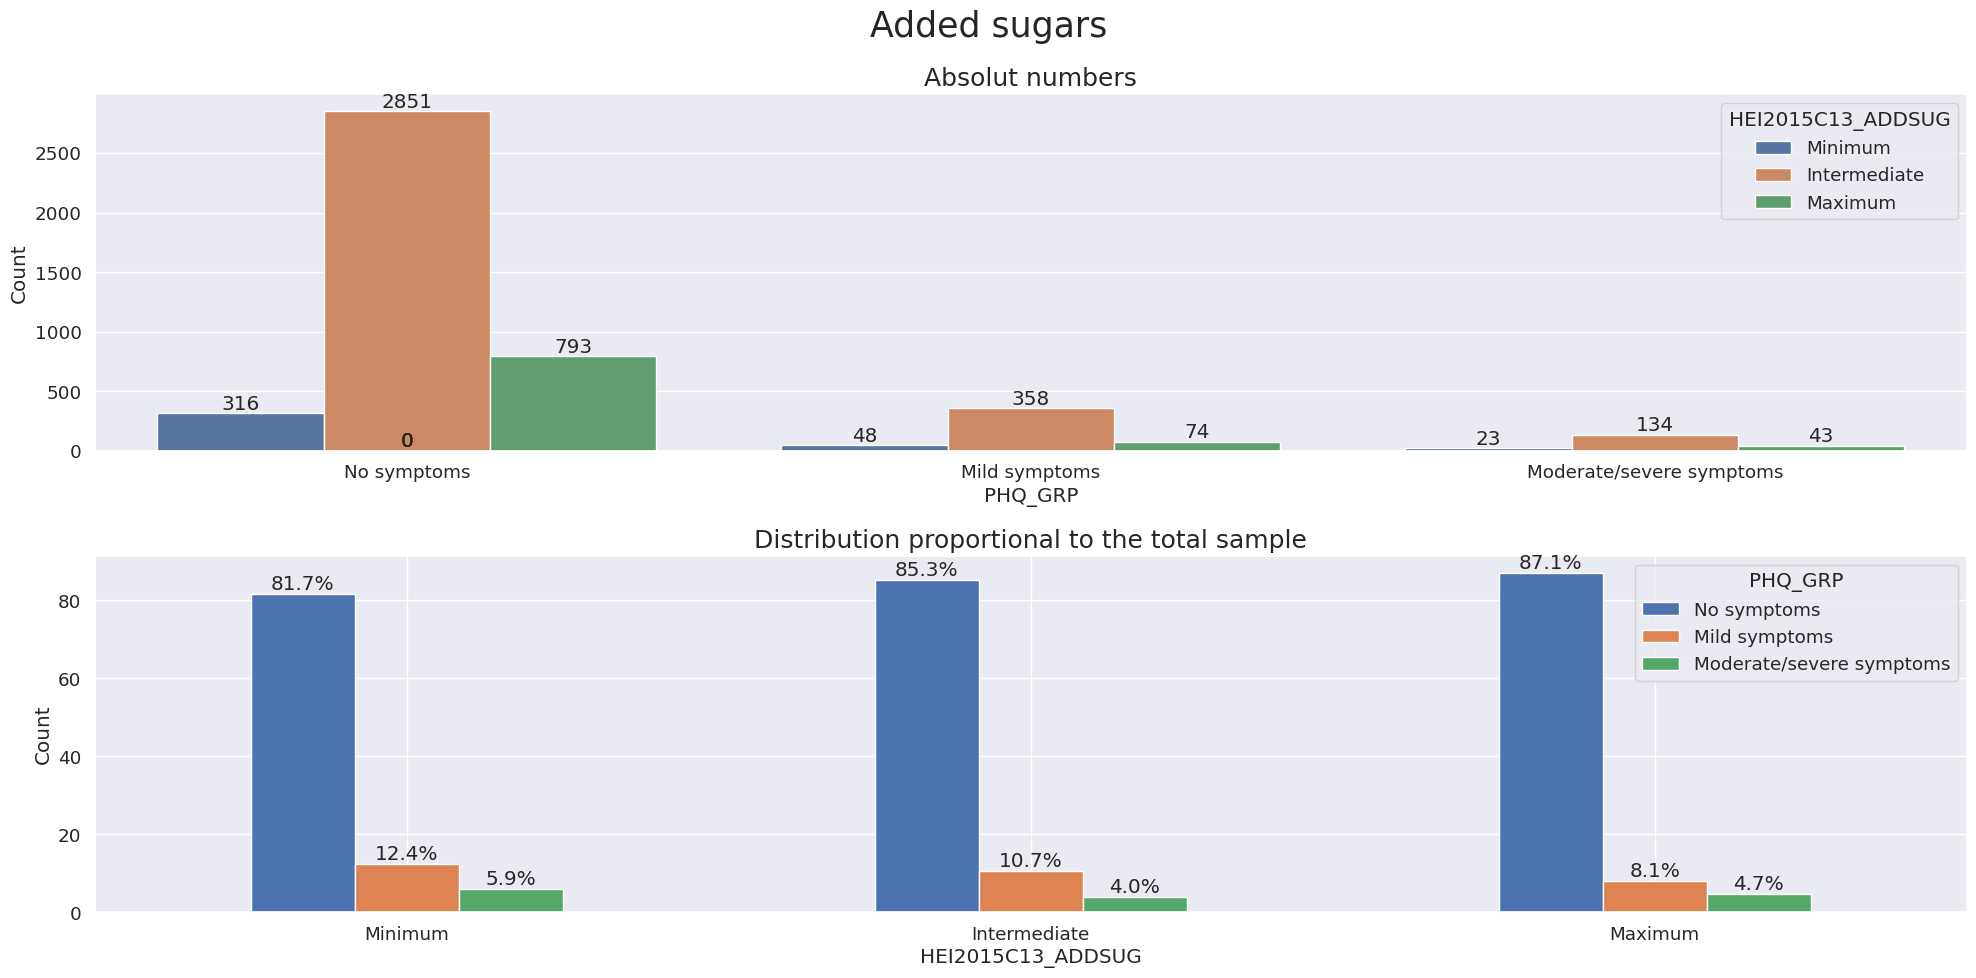

------------------------------------------------------------


In [101]:
list_HEI_depression = []

for category in list_HEI:
    df_aux = pd.crosstab(index=[db2['PHQ_GRP']], columns=[db2[category]])

    stat, p, dof, expected = stats.chi2_contingency(df_aux)

    print('{} - {}'.format(tittle_quant[category].replace(' \n', ''), category))
    print('stat=%.3f, p=%.3f' % (stat, p))

    if p > 0.05:
        print('Probably independent, not rejecting H0\n')
        list_HEI_depression.append(category)
        print('------------------------------------------------------------')
    else:
        print('Probably dependent, rejecting H0\n')
        countplot_graph(db2, 'PHQ_GRP',category, legend_quali, order_quali,tittle_quant[category].replace(' \n', ''))
        print('------------------------------------------------------------')

For several dietary categories, we observe a specific correlation between dietary habits in that category and depression symptom groups, with a clear trend showing a higher proportion of individuals with depression symptoms among those with lower scores relative to the maximum.

Once again, we will compare groups with dietary habits that have a stronger association with depression to those with a weaker association.

In [102]:
sample = db2[(db2['PAG_HRW_log']<0.6) &
             (db2['HEI2015_TOTAL_SCORE']<36)]['PHQ_GRP'].dropna()
proportion_in_sample(sample, 'from the group with healthy habits with the GREATEST association with symptoms of depression')

In sample from the group with healthy habits with the GREATEST association with symptoms of depression we have, out of a total of 162 individuals:
- 82.72% of the sample without symptoms of depression
- 11.11% of the sample with mild symptoms of depression
- 6.17% of the sample with moderate-severe symptoms of depression


In [103]:
sample = db2[(db2['PAG_HRW_log']>2.5) &
             (db2['HEI2015_TOTAL_SCORE']>60)]['PHQ_GRP'].dropna()
proportion_in_sample(sample, 'from the group with healthy habith with the LESS association with symptoms of depression')

In sample from the group with healthy habith with the LESS association with symptoms of depression we have, out of a total of 246 individuals:
- 95.12% of the sample without symptoms of depression
- 3.25% of the sample with mild symptoms of depression
- 1.63% of the sample with moderate-severe symptoms of depression


Finally, we will conduct a brief analysis of the frequency of individuals with depression symptoms in the population with the socio-economic profile most associated with depression, categorizing them by dietary habits and physical activity.

In [106]:
print('We have in the sample a total of {} individuals in socioeconomic conditions strongly associated with symptoms of depression,'
      ' with \n non-Null values for healthy habits and symptoms of depression.'.format((db2[(db2['RIAGENDR']=="Female") &
             ((db2['RIDRETH1']=='Black \n non-Hispanic') | (db2['RIDRETH1']=='Other')) &
             ((db2['DMDEDUC']=="< 9 grade") | (db2['DMDEDUC']=="9-12 grade")) &
             (db2['INDFMINC'] < 20000)].dropna(subset=['PHQ_GRP', 'HEI2015_TOTAL_SCORE', 'PAG_HRW_log'])).shape[0]))

We have in the sample a total of 85 individuals in socioeconomic conditions strongly associated with symptoms of depression, with 
 non-Null values for healthy habits and symptoms of depression.


In [107]:
sample = db2[(db2['RIAGENDR']=="Female") &
             ((db2['RIDRETH1']=='Black \n non-Hispanic') | (db2['RIDRETH1']=="Other")) &
             ((db2['DMDEDUC']=="< 9 grade") | (db2['DMDEDUC']=="9-12 grade")) &
             (db2['INDFMINC'] < 20000) &
             (db2['PAG_HRW_log']>=1) &
             (db2['HEI2015_TOTAL_SCORE']>=50)]['PHQ_GRP'].dropna()
proportion_in_sample(sample, 'from the socioeconomic group with the HIGHEST association with symptoms of depression, who have '
                     'healthy habits for both \n physical activity and diet,')

In sample from the socioeconomic group with the HIGHEST association with symptoms of depression, who have healthy habits for both 
 physical activity and diet, we have, out of a total of 15 individuals:
- 100.00% of the sample without symptoms of depression
- 0.00% of the sample with mild symptoms of depression
- 0.00% of the sample with moderate-severe symptoms of depression


In [108]:
sample = db2[(db2['RIAGENDR']=="Female") &
             ((db2['RIDRETH1']=='Black \n non-Hispanic') | (db2['RIDRETH1']=="Other")) &
             ((db2['DMDEDUC']=="< 9 grade") | (db2['DMDEDUC']=="9-12 grade")) &
             (db2['INDFMINC'] < 20000) &
             (((db2['PAG_HRW_log']>=1) & (db2['HEI2015_TOTAL_SCORE']<50)) |
             ((db2['PAG_HRW_log']<1) & (db2['HEI2015_TOTAL_SCORE']>=50)))]['PHQ_GRP'].dropna()
proportion_in_sample(sample, 'from the socioeconomic group with the HIGHEST association with symptoms of depression, who have'
                     ' healthy habits \n physical activity or diet, but not both,')

In sample from the socioeconomic group with the HIGHEST association with symptoms of depression, who have healthy habits 
 physical activity or diet, but not both, we have, out of a total of 37 individuals:
- 75.68% of the sample without symptoms of depression
- 18.92% of the sample with mild symptoms of depression
- 5.41% of the sample with moderate-severe symptoms of depression


In [109]:
sample = db2[(db2['RIAGENDR']=="Female") &
             ((db2['RIDRETH1']=='Black \n non-Hispanic') | (db2['RIDRETH1']=="Other")) &
             ((db2['DMDEDUC']=="< 9 grade") | (db2['DMDEDUC']=="9-12 grade")) &
             (db2['INDFMINC'] < 20000) &
             (db2['PAG_HRW_log']<1) &
             (db2['HEI2015_TOTAL_SCORE']<50)]['PHQ_GRP'].dropna()
proportion_in_sample(sample, 'from the socioeconomic group with the HIGHEST association with symptoms of depression, who dont have'
                     ' healthy habits for \n physical activity neather diet,')

In sample from the socioeconomic group with the HIGHEST association with symptoms of depression, who dont have healthy habits for 
 physical activity neather diet, we have, out of a total of 33 individuals:
- 57.58% of the sample without symptoms of depression
- 24.24% of the sample with mild symptoms of depression
- 18.18% of the sample with moderate-severe symptoms of depression


## Conclusions

At the end of the analysis, we conclude that there are correlations between healthy dietary habits, physical activity, and depression symptoms, with individuals experiencing depression tending to have poorer health habits.

Additionally, we observe a correlation between socio-economic characteristics and depression, such as being female, belonging to the “Non-Hispanic Black” and “Other” ethnic groups, having low education, and low income, which represent profiles where cases of depression are more frequently found.

However, since the study employed was observational, we cannot assert that healthy habits have a causal effect on the prevention of depression; we can only state that there is a correlation between the two. The existing association may have, for example, reverse causality, where depression could lead to a preference for less healthy foods (e.g., those high in fat or sugar) or a lower frequency of physical activity due to fatigue (a classic symptom of depression).

It is important to emphasize that, although it may not necessarily indicate causality, the differences observed when comparing the groups most and least associated with depression are significant, making it evident that both socio-economic factors and healthy habits are associated with depression.